In [1]:
from fastPLNmodels.utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from fastPLNmodels.models import IMPS_PLN, show, log_likelihood, fastPLN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm
import torch.linalg as TLA



device  cuda


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else : 
    device = torch.device('cpu')
    
#device = torch.device('cpu') # think I can't use RTX A5000 right now, will check this later. 
torch.cuda.is_available()
# print('device ', device)

True

In [4]:
device

device(type='cuda', index=0)

### Simulation of the data 

In [5]:
d = 3
n = 2000;  p = 2000
q = 50

In [6]:
# 0 est pas mal 
#torch.manual_seed(0)
Sigma_sampling = 1*torch.from_numpy(build_block_Sigma(p,50))/3 #+ 0.5*torch.eye(p)
true_C = C_from_Sigma(Sigma_sampling, q)
true_Sigma_sampling = true_C@(true_C.T)
true_beta =torch.randn((d, p))/3

covariates = torch.randn((n,d))
O =  0+torch.zeros((n,p))
Y, Z, _  = sample_PLN(Sigma_sampling,true_beta, O, covariates)
Y = torch.from_numpy(Y).to(device)
covariates = covariates.to(device)
O = O.to(device)


/home/bastien/Documents/PLNpy/fastPLNmodels/utils.py:187: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).transpose(-2, -1).conj().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272155627/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1285.)
  chol = torch.cholesky(Sigma)


<AxesSubplot:>

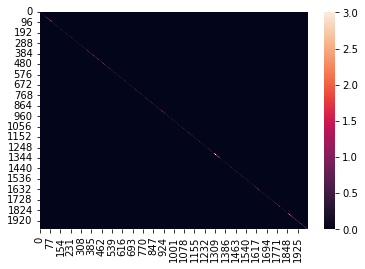

In [7]:
n_a = 0
n_b = p

sns.heatmap(Sigma_sampling[n_a:n_b,n_a:n_b])

## Fitting the IMPS based model

In [16]:
batch_size = 10
IMPS_model = IMPS_PLN(q, nb_average_param = 15, nb_average_likelihood = 6)
%time IMPS_model.fit(Y,O,covariates,100, acc = 0.005, batch_size = batch_size, verbose = False, lr = 0.015)

  0%|          | 0/100 [00:00<?, ?it/s]

time init batch 1.6689300537109375e-05
time log like 0.10351920127868652
time grad_C 0.0010228157043457031
time grad_beta 0.0008766651153564453
time optim.step 0.0005648136138916016
time init batch 1.9311904907226562e-05
time log like 0.07779502868652344
time grad_C 0.0008294582366943359
time grad_beta 0.0007567405700683594
time optim.step 0.00029277801513671875
time init batch 1.9550323486328125e-05
time log like 0.09511351585388184
time grad_C 0.0009768009185791016
time grad_beta 0.000762939453125
time optim.step 0.00027823448181152344
time init batch 2.0742416381835938e-05
time log like 0.08229327201843262
time grad_C 0.0010287761688232422
time grad_beta 0.0009608268737792969
time optim.step 0.0003657341003417969
time init batch 2.0265579223632812e-05
time log like 0.10888504981994629
time grad_C 0.0011162757873535156
time grad_beta 0.0010237693786621094
time optim.step 0.0004050731658935547
time init batch 2.6702880859375e-05
time log like 0.08979201316833496
time grad_C 0.00086545

  1%|          | 1/100 [00:01<02:55,  1.77s/it]

time log like 0.08894991874694824
time grad_C 0.0007193088531494141
time grad_beta 0.0006814002990722656
time optim.step 0.00021600723266601562
time init batch 1.4781951904296875e-05
time log like 0.058260202407836914
time grad_C 0.0005838871002197266
time grad_beta 0.0005898475646972656
time optim.step 0.00018978118896484375
time init batch 1.5974044799804688e-05
time log like 0.05501699447631836
time grad_C 0.0005688667297363281
time grad_beta 0.000591278076171875
time optim.step 0.0001914501190185547
time init batch 1.5497207641601562e-05
time log like 0.08627486228942871
time grad_C 0.0006744861602783203
time grad_beta 0.0006327629089355469
time optim.step 0.00020384788513183594
time init batch 1.5735626220703125e-05
time log like 0.1043403148651123
time grad_C 0.0010111331939697266
time grad_beta 0.0010538101196289062
time optim.step 0.0003254413604736328
time init batch 2.1696090698242188e-05
time log like 0.07267928123474121
time grad_C 0.00106048583984375
time grad_beta 0.00098

  2%|▏         | 2/100 [00:03<02:59,  1.83s/it]

time log like 0.05703401565551758
time grad_C 0.0007507801055908203
time grad_beta 0.0006031990051269531
time optim.step 0.00022983551025390625
time init batch 1.71661376953125e-05
time log like 0.04173636436462402
time grad_C 0.0009071826934814453
time grad_beta 0.0009036064147949219
time optim.step 0.0003371238708496094
time init batch 2.3603439331054688e-05
time log like 0.07020783424377441
time grad_C 0.0009949207305908203
time grad_beta 0.0009098052978515625
time optim.step 0.0003707408905029297
time init batch 2.384185791015625e-05
time log like 0.053311824798583984
time grad_C 0.0008628368377685547
time grad_beta 0.0008866786956787109
time optim.step 0.00034737586975097656
time init batch 2.47955322265625e-05
time log like 0.055159568786621094
time grad_C 0.0016777515411376953
time grad_beta 0.0006539821624755859
time optim.step 0.00027871131896972656
time init batch 1.9311904907226562e-05
time log like 0.06365966796875
time grad_C 0.0005905628204345703
time grad_beta 0.00063037

  3%|▎         | 3/100 [00:04<02:21,  1.46s/it]

time log like 0.04562067985534668
time grad_C 0.0007233619689941406
time grad_beta 0.0006122589111328125
time optim.step 0.00022268295288085938
time init batch 1.9788742065429688e-05
time log like 0.03587841987609863
time grad_C 0.0006182193756103516
time grad_beta 0.0005950927734375
time optim.step 0.0002224445343017578
time init batch 1.4781951904296875e-05
time log like 0.03826141357421875
time grad_C 0.0006458759307861328
time grad_beta 0.0006895065307617188
time optim.step 0.00025653839111328125
time init batch 1.6927719116210938e-05
time log like 0.046862125396728516
time grad_C 0.0008413791656494141
time grad_beta 0.0008401870727539062
time optim.step 0.00032520294189453125
time init batch 2.956390380859375e-05
time log like 0.04576730728149414
time grad_C 0.0008330345153808594
time grad_beta 0.0008871555328369141
time optim.step 0.0003325939178466797
time init batch 2.002716064453125e-05
time log like 0.05251789093017578
time grad_C 0.0009644031524658203
time grad_beta 0.000892

  4%|▍         | 4/100 [00:06<02:17,  1.43s/it]

time log like 0.06350421905517578
time grad_C 0.0011932849884033203
time grad_beta 0.0011603832244873047
time optim.step 0.0003476142883300781
time init batch 2.1219253540039062e-05
time log like 0.13379192352294922
time grad_C 0.0011088848114013672
time grad_beta 0.001142740249633789
time optim.step 0.0003445148468017578
time init batch 2.1457672119140625e-05
time log like 0.04964709281921387
time grad_C 0.0010159015655517578
time grad_beta 0.001707315444946289
time optim.step 0.0003273487091064453
time init batch 2.3365020751953125e-05
time log like 0.06232118606567383
time grad_C 0.0011477470397949219
time grad_beta 0.0011553764343261719
time optim.step 0.0003769397735595703
time init batch 2.288818359375e-05
time log like 0.050810813903808594
time grad_C 0.0010907649993896484
time grad_beta 0.0010945796966552734
time optim.step 0.0003249645233154297
time init batch 2.1457672119140625e-05
time log like 0.04736065864562988
time grad_C 0.0010867118835449219
time grad_beta 0.0011374950

  5%|▌         | 5/100 [00:07<02:09,  1.36s/it]

time log like 0.04824256896972656
time grad_C 0.001195669174194336
time grad_beta 0.0009813308715820312
time optim.step 0.00024628639221191406
time init batch 2.7894973754882812e-05
time log like 0.05120110511779785
time grad_C 0.0006895065307617188
time grad_beta 0.0006957054138183594
time optim.step 0.000263214111328125
time init batch 1.5974044799804688e-05
time log like 0.03166484832763672
time grad_C 0.0006258487701416016
time grad_beta 0.0006530284881591797
time optim.step 0.0002455711364746094
time init batch 1.7642974853515625e-05
time log like 0.04243588447570801
time grad_C 0.0006186962127685547
time grad_beta 0.0006544589996337891
time optim.step 0.00024580955505371094
time init batch 1.5497207641601562e-05
time log like 0.029475688934326172
time grad_C 0.0006711483001708984
time grad_beta 0.0007066726684570312
time optim.step 0.0002465248107910156
time init batch 1.6689300537109375e-05
time log like 0.04021000862121582
time grad_C 0.00081634521484375
time grad_beta 0.000608

  6%|▌         | 6/100 [00:08<02:03,  1.31s/it]

time log like 0.05141806602478027
time grad_C 0.0010156631469726562
time grad_beta 0.0009012222290039062
time optim.step 0.00034689903259277344
time init batch 2.1696090698242188e-05
time log like 0.06344914436340332
time grad_C 0.0008189678192138672
time grad_beta 0.0008831024169921875
time optim.step 0.00034499168395996094
time init batch 3.314018249511719e-05
time log like 0.06827235221862793
time grad_C 0.0009739398956298828
time grad_beta 0.0009500980377197266
time optim.step 0.00039267539978027344
time init batch 2.6464462280273438e-05
time log like 0.04831981658935547
time grad_C 0.0011286735534667969
time grad_beta 0.0013103485107421875
time optim.step 0.0005440711975097656
time init batch 3.719329833984375e-05
time log like 0.040358543395996094
time grad_C 0.0008702278137207031
time grad_beta 0.0008394718170166016
time optim.step 0.0003459453582763672
time init batch 1.9788742065429688e-05
time log like 0.050321340560913086
time grad_C 0.0008223056793212891
time grad_beta 0.00

  7%|▋         | 7/100 [00:09<01:53,  1.22s/it]

time log like 0.05176711082458496
time grad_C 0.00047898292541503906
time grad_beta 0.0005424022674560547
time optim.step 0.00018978118896484375
time init batch 1.3113021850585938e-05
time log like 0.04115557670593262
time grad_C 0.0005884170532226562
time grad_beta 0.0005276203155517578
time optim.step 0.00019025802612304688
time init batch 1.4781951904296875e-05
time log like 0.03239107131958008
time grad_C 0.00046944618225097656
time grad_beta 0.0005316734313964844
time optim.step 0.00018978118896484375
time init batch 1.5497207641601562e-05
time log like 0.03840041160583496
time grad_C 0.0005097389221191406
time grad_beta 0.0005214214324951172
time optim.step 0.00018906593322753906
time init batch 1.430511474609375e-05
time log like 0.03855562210083008
time grad_C 0.0005109310150146484
time grad_beta 0.0005257129669189453
time optim.step 0.0001895427703857422
time init batch 1.4781951904296875e-05
time log like 0.03806424140930176
time grad_C 0.0006566047668457031
time grad_beta 0.

  8%|▊         | 8/100 [00:10<01:39,  1.08s/it]

time log like 0.04118680953979492
time grad_C 0.0006244182586669922
time grad_beta 0.0005495548248291016
time optim.step 0.0001976490020751953
time init batch 1.4066696166992188e-05
time log like 0.032315731048583984
time grad_C 0.0004892349243164062
time grad_beta 0.0005371570587158203
time optim.step 0.0001914501190185547
time init batch 1.621246337890625e-05
time log like 0.038838863372802734
time grad_C 0.0005390644073486328
time grad_beta 0.0005681514739990234
time optim.step 0.0001952648162841797
time init batch 1.4066696166992188e-05
time log like 0.03718829154968262
time grad_C 0.00052642822265625
time grad_beta 0.00046372413635253906
time optim.step 0.00018930435180664062
time init batch 1.4066696166992188e-05
time log like 0.034819841384887695
time grad_C 0.0005664825439453125
time grad_beta 0.0005252361297607422
time optim.step 0.0001900196075439453
time init batch 1.3828277587890625e-05
time log like 0.025301694869995117
time grad_C 0.0005235671997070312
time grad_beta 0.00

  9%|▉         | 9/100 [00:11<01:30,  1.00it/s]

time log like 0.04389834403991699
time grad_C 0.0006515979766845703
time grad_beta 0.0005662441253662109
time optim.step 0.00018835067749023438
time init batch 1.3828277587890625e-05
time log like 0.04007220268249512
time grad_C 0.000553131103515625
time grad_beta 0.0005764961242675781
time optim.step 0.0001888275146484375
time init batch 1.430511474609375e-05
time log like 0.03159070014953613
time grad_C 0.0005645751953125
time grad_beta 0.0005624294281005859
time optim.step 0.00018906593322753906
time init batch 1.430511474609375e-05
time log like 0.03228878974914551
time grad_C 0.0005328655242919922
time grad_beta 0.0005557537078857422
time optim.step 0.00018978118896484375
time init batch 1.52587890625e-05
time log like 0.030688047409057617
time grad_C 0.0005478858947753906
time grad_beta 0.0005571842193603516
time optim.step 0.0001900196075439453
time init batch 1.4781951904296875e-05
time log like 0.038626909255981445
time grad_C 0.0005521774291992188
time grad_beta 0.00057005882

 10%|█         | 10/100 [00:12<01:33,  1.04s/it]

time optim.step 0.00023674964904785156
time init batch 2.193450927734375e-05
time log like 0.04254007339477539
time grad_C 0.0012547969818115234
time grad_beta 0.0011379718780517578
time optim.step 0.0005717277526855469
time init batch 4.7206878662109375e-05
time log like 0.05137324333190918
time grad_C 0.001039743423461914
time grad_beta 0.0010254383087158203
time optim.step 0.0004138946533203125
time init batch 3.528594970703125e-05
time log like 0.05455970764160156
time grad_C 0.0009236335754394531
time grad_beta 0.0008914470672607422
time optim.step 0.00034809112548828125
time init batch 2.8133392333984375e-05
time log like 0.04505157470703125
time grad_C 0.000690460205078125
time grad_beta 0.0006046295166015625
time optim.step 0.00022530555725097656
time init batch 1.8596649169921875e-05
time log like 0.06399297714233398
time grad_C 0.0006358623504638672
time grad_beta 0.0006024837493896484
time optim.step 0.00022983551025390625
time init batch 1.9550323486328125e-05
time log like

 11%|█         | 11/100 [00:13<01:31,  1.03s/it]

time log like 0.044164419174194336
time grad_C 0.0007200241088867188
time grad_beta 0.0006034374237060547
time optim.step 0.00022411346435546875
time init batch 1.9073486328125e-05
time log like 0.04685711860656738
time grad_C 0.0006680488586425781
time grad_beta 0.0006017684936523438
time optim.step 0.0002257823944091797
time init batch 1.6927719116210938e-05
time log like 0.04024457931518555
time grad_C 0.0005805492401123047
time grad_beta 0.000598907470703125
time optim.step 0.00023508071899414062
time init batch 1.9073486328125e-05
time log like 0.08958315849304199
time grad_C 0.0006384849548339844
time grad_beta 0.0005970001220703125
time optim.step 0.00022530555725097656
time init batch 1.7404556274414062e-05
time log like 0.047777414321899414
time grad_C 0.0005445480346679688
time grad_beta 0.0006072521209716797
time optim.step 0.00022363662719726562
time init batch 1.811981201171875e-05
time log like 0.040258169174194336
time grad_C 0.0005805492401123047
time grad_beta 0.000591

 12%|█▏        | 12/100 [00:14<01:28,  1.01s/it]

time log like 0.03940010070800781
time grad_C 0.0006928443908691406
time grad_beta 0.0006120204925537109
time optim.step 0.00022339820861816406
time init batch 1.7642974853515625e-05
time log like 0.04391813278198242
time grad_C 0.0005955696105957031
time grad_beta 0.0006136894226074219
time optim.step 0.0002224445343017578
time init batch 1.7404556274414062e-05
time log like 0.026518821716308594
time grad_C 0.0006496906280517578
time grad_beta 0.0005946159362792969
time optim.step 0.0002238750457763672
time init batch 1.811981201171875e-05
time log like 0.03694510459899902
time grad_C 0.0006656646728515625
time grad_beta 0.0005974769592285156
time optim.step 0.00022530555725097656
time init batch 1.8596649169921875e-05
time log like 0.027805089950561523
time grad_C 0.0006597042083740234
time grad_beta 0.0006048679351806641
time optim.step 0.00022339820861816406
time init batch 1.7881393432617188e-05
time log like 0.02771759033203125
time grad_C 0.0006721019744873047
time grad_beta 0.0

 13%|█▎        | 13/100 [00:15<01:29,  1.03s/it]

time log like 0.05538678169250488
time grad_C 0.0012323856353759766
time grad_beta 0.0011563301086425781
time optim.step 0.0003485679626464844
time init batch 2.1219253540039062e-05
time log like 0.05194377899169922
time grad_C 0.0010776519775390625
time grad_beta 0.0011022090911865234
time optim.step 0.00032258033752441406
time init batch 2.0265579223632812e-05
time log like 0.051622867584228516
time grad_C 0.0013098716735839844
time grad_beta 0.0011441707611083984
time optim.step 0.00035119056701660156
time init batch 2.3365020751953125e-05
time log like 0.03884530067443848
time grad_C 0.0008690357208251953
time grad_beta 0.0008826255798339844
time optim.step 0.00036525726318359375
time init batch 2.2649765014648438e-05
time log like 0.05362367630004883
time grad_C 0.0011260509490966797
time grad_beta 0.0008053779602050781
time optim.step 0.00022864341735839844
time init batch 2.0265579223632812e-05
time log like 0.03669881820678711
time grad_C 0.0009834766387939453
time grad_beta 0.

 14%|█▍        | 14/100 [00:16<01:28,  1.03s/it]

time init batch 2.0503997802734375e-05
time log like 0.0430300235748291
time grad_C 0.0007264614105224609
time grad_beta 0.0006539821624755859
time optim.step 0.0002429485321044922
time init batch 1.811981201171875e-05
time log like 0.03815293312072754
time grad_C 0.0005958080291748047
time grad_beta 0.0005900859832763672
time optim.step 0.00022363662719726562
time init batch 1.5735626220703125e-05
time log like 0.03826403617858887
time grad_C 0.0005848407745361328
time grad_beta 0.0005805492401123047
time optim.step 0.00021457672119140625
time init batch 1.430511474609375e-05
time log like 0.05102205276489258
time grad_C 0.0008025169372558594
time grad_beta 0.0008265972137451172
time optim.step 0.00032401084899902344
time init batch 2.09808349609375e-05
time log like 0.049131155014038086
time grad_C 0.0008368492126464844
time grad_beta 0.000659942626953125
time optim.step 0.0002319812774658203
time init batch 2.09808349609375e-05
time log like 0.0597989559173584
time grad_C 0.00077295

 15%|█▌        | 15/100 [00:17<01:26,  1.02s/it]

time log like 0.05984377861022949
time grad_C 0.000919342041015625
time grad_beta 0.0008196830749511719
time optim.step 0.0002911090850830078
time init batch 2.4080276489257812e-05
time log like 0.0521547794342041
time grad_C 0.0006341934204101562
time grad_beta 0.0006430149078369141
time optim.step 0.00022602081298828125
time init batch 1.7881393432617188e-05
time log like 0.03568530082702637
time grad_C 0.0006139278411865234
time grad_beta 0.0006382465362548828
time optim.step 0.0002257823944091797
time init batch 2.86102294921875e-05
time log like 0.043364524841308594
time grad_C 0.0006530284881591797
time grad_beta 0.0006413459777832031
time optim.step 0.00022721290588378906
time init batch 1.8835067749023438e-05
time log like 0.03764772415161133
time grad_C 0.0007414817810058594
time grad_beta 0.0006663799285888672
time optim.step 0.0002276897430419922
time init batch 1.7642974853515625e-05
time log like 0.04131126403808594
time grad_C 0.0007638931274414062
time grad_beta 0.000611

 16%|█▌        | 16/100 [00:18<01:27,  1.04s/it]

time log like 0.06421279907226562
time grad_C 0.0008218288421630859
time grad_beta 0.0007691383361816406
time optim.step 0.0002925395965576172
time init batch 1.6450881958007812e-05
time log like 0.04561352729797363
time grad_C 0.0008037090301513672
time grad_beta 0.0008385181427001953
time optim.step 0.00032258033752441406
time init batch 1.7881393432617188e-05
time log like 0.051316022872924805
time grad_C 0.0009021759033203125
time grad_beta 0.0008757114410400391
time optim.step 0.0003407001495361328
time init batch 2.0503997802734375e-05
time log like 0.04124855995178223
time grad_C 0.0009469985961914062
time grad_beta 0.0009813308715820312
time optim.step 0.00038051605224609375
time init batch 2.3365020751953125e-05
time log like 0.05165886878967285
time grad_C 0.0009546279907226562
time grad_beta 0.0009479522705078125
time optim.step 0.0003943443298339844
time init batch 1.9550323486328125e-05
time log like 0.07251119613647461
time grad_C 0.0009191036224365234
time grad_beta 0.00

 17%|█▋        | 17/100 [00:19<01:24,  1.01s/it]

time log like 0.05736970901489258
time grad_C 0.0007150173187255859
time grad_beta 0.00060272216796875
time optim.step 0.00023484230041503906
time init batch 1.9550323486328125e-05
time log like 0.03606009483337402
time grad_C 0.0006239414215087891
time grad_beta 0.0006289482116699219
time optim.step 0.00022339820861816406
time init batch 1.7642974853515625e-05
time log like 0.038492679595947266
time grad_C 0.0006377696990966797
time grad_beta 0.000614166259765625
time optim.step 0.00023102760314941406
time init batch 1.7642974853515625e-05
time log like 0.034821510314941406
time grad_C 0.0006020069122314453
time grad_beta 0.00060272216796875
time optim.step 0.0002219676971435547
time init batch 1.811981201171875e-05
time log like 0.026846885681152344
time grad_C 0.0006101131439208984
time grad_beta 0.0005974769592285156
time optim.step 0.00022220611572265625
time init batch 1.7404556274414062e-05
time log like 0.0283963680267334
time grad_C 0.0005915164947509766
time grad_beta 0.00059

 18%|█▊        | 18/100 [00:20<01:22,  1.00s/it]

time log like 0.04639458656311035
time grad_C 0.0007102489471435547
time grad_beta 0.0006368160247802734
time optim.step 0.00023674964904785156
time init batch 1.7881393432617188e-05
time log like 0.0495905876159668
time grad_C 0.0008392333984375
time grad_beta 0.0007891654968261719
time optim.step 0.00029468536376953125
time init batch 1.8835067749023438e-05
time log like 0.03305172920227051
time grad_C 0.0007777214050292969
time grad_beta 0.0007853507995605469
time optim.step 0.00029468536376953125
time init batch 2.4318695068359375e-05
time log like 0.035327911376953125
time grad_C 0.000774383544921875
time grad_beta 0.0007851123809814453
time optim.step 0.000293731689453125
time init batch 2.5272369384765625e-05
time log like 0.04745125770568848
time grad_C 0.0008230209350585938
time grad_beta 0.0006575584411621094
time optim.step 0.0002334117889404297
time init batch 2.002716064453125e-05
time log like 0.03985261917114258
time grad_C 0.0012693405151367188
time grad_beta 0.00124788

 19%|█▉        | 19/100 [00:21<01:27,  1.08s/it]

time init batch 2.4557113647460938e-05
time log like 0.043265342712402344
time grad_C 0.0009946823120117188
time grad_beta 0.0009675025939941406
time optim.step 0.00038743019104003906
time init batch 2.5987625122070312e-05
time log like 0.06841444969177246
time grad_C 0.0008642673492431641
time grad_beta 0.0008897781372070312
time optim.step 0.0003559589385986328
time init batch 2.3126602172851562e-05
time log like 0.0640559196472168
time grad_C 0.0010831356048583984
time grad_beta 0.0006277561187744141
time optim.step 0.0002715587615966797
time init batch 2.0742416381835938e-05
time log like 0.04563260078430176
time grad_C 0.0008478164672851562
time grad_beta 0.0007145404815673828
time optim.step 0.00027060508728027344
time init batch 1.9311904907226562e-05
time log like 0.032747745513916016
time grad_C 0.0006468296051025391
time grad_beta 0.000705718994140625
time optim.step 0.0002689361572265625
time init batch 1.9311904907226562e-05
time log like 0.05355191230773926
time grad_C 0.0

 20%|██        | 20/100 [00:22<01:24,  1.06s/it]

time log like 0.05919194221496582
time grad_C 0.0009586811065673828
time grad_beta 0.0009539127349853516
time optim.step 0.00042057037353515625
time init batch 2.193450927734375e-05
time log like 0.05484318733215332
time grad_C 0.0006699562072753906
time grad_beta 0.0006368160247802734
time optim.step 0.00023698806762695312
time init batch 1.8596649169921875e-05
time log like 0.030896902084350586
time grad_C 0.0006868839263916016
time grad_beta 0.0006518363952636719
time optim.step 0.00023508071899414062
time init batch 2.0265579223632812e-05
time log like 0.046596527099609375
time grad_C 0.0006356239318847656
time grad_beta 0.0006549358367919922
time optim.step 0.00023794174194335938
time init batch 1.9788742065429688e-05
time log like 0.038565874099731445
time grad_C 0.0006663799285888672
time grad_beta 0.0006389617919921875
time optim.step 0.0002455711364746094
time init batch 1.9788742065429688e-05
time log like 0.02972102165222168
time grad_C 0.00067901611328125
time grad_beta 0.0

 21%|██        | 21/100 [00:23<01:24,  1.07s/it]

time log like 0.057833194732666016
time grad_C 0.0010304450988769531
time grad_beta 0.0011370182037353516
time optim.step 0.0003814697265625
time init batch 2.574920654296875e-05
time log like 0.053243398666381836
time grad_C 0.0008575916290283203
time grad_beta 0.000888824462890625
time optim.step 0.00035381317138671875
time init batch 2.2411346435546875e-05
time log like 0.04935812950134277
time grad_C 0.0009012222290039062
time grad_beta 0.0009486675262451172
time optim.step 0.00035691261291503906
time init batch 2.2172927856445312e-05
time log like 0.054433345794677734
time grad_C 0.0008866786956787109
time grad_beta 0.0007755756378173828
time optim.step 0.0002391338348388672
time init batch 1.7404556274414062e-05
time log like 0.037676334381103516
time grad_C 0.0010800361633300781
time grad_beta 0.0008180141448974609
time optim.step 0.00023365020751953125
time init batch 1.811981201171875e-05
time log like 0.04583382606506348
time grad_C 0.0009653568267822266
time grad_beta 0.0008

 22%|██▏       | 22/100 [00:24<01:25,  1.10s/it]

time log like 0.042821407318115234
time grad_C 0.0010027885437011719
time grad_beta 0.0009586811065673828
time optim.step 0.0004246234893798828
time init batch 2.2172927856445312e-05
time log like 0.10642361640930176
time grad_C 0.0010273456573486328
time grad_beta 0.0009617805480957031
time optim.step 0.000408172607421875
time init batch 2.5272369384765625e-05
time log like 0.04117918014526367
time grad_C 0.0008897781372070312
time grad_beta 0.0009503364562988281
time optim.step 0.0003554821014404297
time init batch 2.288818359375e-05
time log like 0.039861440658569336
time grad_C 0.0009944438934326172
time grad_beta 0.0009675025939941406
time optim.step 0.0003879070281982422
time init batch 2.3126602172851562e-05
time log like 0.0425722599029541
time grad_C 0.0008547306060791016
time grad_beta 0.0008864402770996094
time optim.step 0.0003581047058105469
time init batch 2.4080276489257812e-05
time log like 0.04168558120727539
time grad_C 0.0008552074432373047
time grad_beta 0.000883340

 23%|██▎       | 23/100 [00:26<01:28,  1.14s/it]

time log like 0.0723259449005127
time grad_C 0.0008375644683837891
time grad_beta 0.0008542537689208984
time optim.step 0.0003337860107421875
time init batch 2.3365020751953125e-05
time log like 0.06413006782531738
time grad_C 0.0008127689361572266
time grad_beta 0.0008320808410644531
time optim.step 0.00033164024353027344
time init batch 2.193450927734375e-05
time log like 0.041258811950683594
time grad_C 0.0008950233459472656
time grad_beta 0.0009486675262451172
time optim.step 0.0003914833068847656
time init batch 2.2411346435546875e-05
time log like 0.05823683738708496
time grad_C 0.0008182525634765625
time grad_beta 0.0008740425109863281
time optim.step 0.00035381317138671875
time init batch 2.1219253540039062e-05
time log like 0.028509140014648438
time grad_C 0.0006947517395019531
time grad_beta 0.0006041526794433594
time optim.step 0.0002334117889404297
time init batch 2.1219253540039062e-05
time log like 0.048424720764160156
time grad_C 0.0005838871002197266
time grad_beta 0.00

 24%|██▍       | 24/100 [00:27<01:24,  1.11s/it]

time log like 0.07192301750183105
time grad_C 0.000713348388671875
time grad_beta 0.0006458759307861328
time optim.step 0.00024008750915527344
time init batch 1.6927719116210938e-05
time log like 0.056260108947753906
time grad_C 0.0006206035614013672
time grad_beta 0.0006539821624755859
time optim.step 0.00022912025451660156
time init batch 1.7642974853515625e-05
time log like 0.07476186752319336
time grad_C 0.000621795654296875
time grad_beta 0.0006492137908935547
time optim.step 0.0002262592315673828
time init batch 1.6450881958007812e-05
time log like 0.08191514015197754
time grad_C 0.00072479248046875
time grad_beta 0.0006473064422607422
time optim.step 0.00022840499877929688
time init batch 1.8596649169921875e-05
time log like 0.03418898582458496
time grad_C 0.000629425048828125
time grad_beta 0.0006568431854248047
time optim.step 0.00022840499877929688
time init batch 1.9311904907226562e-05
time log like 0.050804853439331055
time grad_C 0.0006172657012939453
time grad_beta 0.0006

 25%|██▌       | 25/100 [00:28<01:21,  1.09s/it]

time log like 0.05079770088195801
time grad_C 0.0008718967437744141
time grad_beta 0.0008063316345214844
time optim.step 0.00032830238342285156
time init batch 2.1457672119140625e-05
time log like 0.05149102210998535
time grad_C 0.0008280277252197266
time grad_beta 0.0008821487426757812
time optim.step 0.00032782554626464844
time init batch 2.4080276489257812e-05
time log like 0.05031418800354004
time grad_C 0.0008656978607177734
time grad_beta 0.0009052753448486328
time optim.step 0.0003476142883300781
time init batch 2.1457672119140625e-05
time log like 0.04615974426269531
time grad_C 0.0008423328399658203
time grad_beta 0.0008902549743652344
time optim.step 0.00032711029052734375
time init batch 1.9073486328125e-05
time log like 0.037515878677368164
time grad_C 0.0008614063262939453
time grad_beta 0.0008521080017089844
time optim.step 0.00032830238342285156
time init batch 2.002716064453125e-05
time log like 0.03630709648132324
time grad_C 0.0007712841033935547
time grad_beta 0.0007

 26%|██▌       | 26/100 [00:29<01:19,  1.08s/it]

time log like 0.06358885765075684
time grad_C 0.0006821155548095703
time grad_beta 0.0006194114685058594
time optim.step 0.00022721290588378906
time init batch 1.71661376953125e-05
time log like 0.035675764083862305
time grad_C 0.0005636215209960938
time grad_beta 0.0006241798400878906
time optim.step 0.0002372264862060547
time init batch 1.7881393432617188e-05
time log like 0.048667192459106445
time grad_C 0.0005967617034912109
time grad_beta 0.0006229877471923828
time optim.step 0.0002262592315673828
time init batch 1.8835067749023438e-05
time log like 0.03815054893493652
time grad_C 0.0005908012390136719
time grad_beta 0.0006189346313476562
time optim.step 0.00022482872009277344
time init batch 1.8835067749023438e-05
time log like 0.04948830604553223
time grad_C 0.0005350112915039062
time grad_beta 0.0005404949188232422
time optim.step 0.00019216537475585938
time init batch 1.4066696166992188e-05
time log like 0.08160066604614258
time grad_C 0.0011172294616699219
time grad_beta 0.00

 27%|██▋       | 27/100 [00:30<01:19,  1.09s/it]

time log like 0.04279470443725586
time grad_C 0.0009455680847167969
time grad_beta 0.0008249282836914062
time optim.step 0.000301361083984375
time init batch 1.9788742065429688e-05
time log like 0.044255733489990234
time grad_C 0.0008876323699951172
time grad_beta 0.0008783340454101562
time optim.step 0.0003414154052734375
time init batch 2.09808349609375e-05
time log like 0.09193253517150879
time grad_C 0.0009655952453613281
time grad_beta 0.0009558200836181641
time optim.step 0.0003771781921386719
time init batch 2.193450927734375e-05
time log like 0.038770437240600586
time grad_C 0.0008945465087890625
time grad_beta 0.0008871555328369141
time optim.step 0.00034618377685546875
time init batch 2.1457672119140625e-05
time log like 0.03982973098754883
time grad_C 0.0008819103240966797
time grad_beta 0.0009005069732666016
time optim.step 0.0003466606140136719
time init batch 2.1696090698242188e-05
time log like 0.04777050018310547
time grad_C 0.0008170604705810547
time grad_beta 0.000901

 28%|██▊       | 28/100 [00:31<01:18,  1.09s/it]

time log like 0.041048288345336914
time grad_C 0.0009448528289794922
time grad_beta 0.0008890628814697266
time optim.step 0.0003466606140136719
time init batch 2.1219253540039062e-05
time log like 0.05132412910461426
time grad_C 0.0009005069732666016
time grad_beta 0.0008883476257324219
time optim.step 0.00034737586975097656
time init batch 2.1219253540039062e-05
time log like 0.06408953666687012
time grad_C 0.0008890628814697266
time grad_beta 0.0008866786956787109
time optim.step 0.0003478527069091797
time init batch 2.288818359375e-05
time log like 0.03788018226623535
time grad_C 0.0009081363677978516
time grad_beta 0.0009028911590576172
time optim.step 0.00035262107849121094
time init batch 2.09808349609375e-05
time log like 0.03897213935852051
time grad_C 0.0008673667907714844
time grad_beta 0.0008301734924316406
time optim.step 0.0003218650817871094
time init batch 2.002716064453125e-05
time log like 0.038617849349975586
time grad_C 0.0008180141448974609
time grad_beta 0.00088524

 29%|██▉       | 29/100 [00:32<01:18,  1.11s/it]

time log like 0.03866004943847656
time grad_C 0.0009279251098632812
time grad_beta 0.0009002685546875
time optim.step 0.0003719329833984375
time init batch 2.0503997802734375e-05
time log like 0.04737663269042969
time grad_C 0.0007719993591308594
time grad_beta 0.000843048095703125
time optim.step 0.00032329559326171875
time init batch 2.1457672119140625e-05
time log like 0.05145454406738281
time grad_C 0.0008804798126220703
time grad_beta 0.0009436607360839844
time optim.step 0.00034689903259277344
time init batch 2.002716064453125e-05
time log like 0.05071663856506348
time grad_C 0.0008168220520019531
time grad_beta 0.0008788108825683594
time optim.step 0.00036334991455078125
time init batch 2.288818359375e-05
time log like 0.05789947509765625
time grad_C 0.0010116100311279297
time grad_beta 0.0010404586791992188
time optim.step 0.0003726482391357422
time init batch 2.1696090698242188e-05
time log like 0.03909111022949219
time grad_C 0.0008149147033691406
time grad_beta 0.00088477134

 30%|███       | 30/100 [00:33<01:17,  1.11s/it]

time log like 0.05541062355041504
time grad_C 0.0009844303131103516
time grad_beta 0.0008873939514160156
time optim.step 0.0003693103790283203
time init batch 2.1696090698242188e-05
time log like 0.08179354667663574
time grad_C 0.0008924007415771484
time grad_beta 0.0008814334869384766
time optim.step 0.0003631114959716797
time init batch 2.09808349609375e-05
time log like 0.04004216194152832
time grad_C 0.0009219646453857422
time grad_beta 0.0008940696716308594
time optim.step 0.00034809112548828125
time init batch 2.2649765014648438e-05
time log like 0.03890800476074219
time grad_C 0.0008518695831298828
time grad_beta 0.0008385181427001953
time optim.step 0.0003249645233154297
time init batch 1.8835067749023438e-05
time log like 0.05094122886657715
time grad_C 0.0009710788726806641
time grad_beta 0.0009129047393798828
time optim.step 0.0003457069396972656
time init batch 2.0265579223632812e-05
time log like 0.04150676727294922
time grad_C 0.0008699893951416016
time grad_beta 0.000957

 31%|███       | 31/100 [00:34<01:15,  1.09s/it]

time grad_C 0.0010077953338623047
time grad_beta 0.0007648468017578125
time optim.step 0.0002608299255371094
time init batch 1.8835067749023438e-05
time log like 0.042769432067871094
time grad_C 0.0006847381591796875
time grad_beta 0.0006890296936035156
time optim.step 0.0002579689025878906
time init batch 1.9311904907226562e-05
time log like 0.03202390670776367
time grad_C 0.0006661415100097656
time grad_beta 0.0006883144378662109
time optim.step 0.00026917457580566406
time init batch 2.002716064453125e-05
time log like 0.03186225891113281
time grad_C 0.0006625652313232422
time grad_beta 0.0006968975067138672
time optim.step 0.00025963783264160156
time init batch 2.002716064453125e-05
time log like 0.04256463050842285
time grad_C 0.0006775856018066406
time grad_beta 0.0006861686706542969
time optim.step 0.00025653839111328125
time init batch 2.0265579223632812e-05
time log like 0.029982328414916992
time grad_C 0.0007340908050537109
time grad_beta 0.0006892681121826172
time optim.step 

 32%|███▏      | 32/100 [00:35<01:10,  1.04s/it]

time optim.step 0.0003514289855957031
time init batch 2.5272369384765625e-05
time log like 0.07205891609191895
time grad_C 0.0009555816650390625
time grad_beta 0.0009665489196777344
time optim.step 0.00034546852111816406
time init batch 1.9788742065429688e-05
time log like 0.054648637771606445
time grad_C 0.0009646415710449219
time grad_beta 0.0009322166442871094
time optim.step 0.00034427642822265625
time init batch 2.1457672119140625e-05
time log like 0.041445016860961914
time grad_C 0.0009415149688720703
time grad_beta 0.0009613037109375
time optim.step 0.0003726482391357422
time init batch 2.1219253540039062e-05
time log like 0.03983259201049805
time grad_C 0.0011837482452392578
time grad_beta 0.0011267662048339844
time optim.step 0.0003457069396972656
time init batch 2.1457672119140625e-05
time log like 0.0384068489074707
time grad_C 0.0010862350463867188
time grad_beta 0.001134634017944336
time optim.step 0.00030350685119628906
time init batch 1.9073486328125e-05
time log like 0.

 33%|███▎      | 33/100 [00:36<01:10,  1.05s/it]

time log like 0.06296586990356445
time grad_C 0.001287698745727539
time grad_beta 0.0012621879577636719
time optim.step 0.0003261566162109375
time init batch 2.2649765014648438e-05
time log like 0.04091691970825195
time grad_C 0.001176595687866211
time grad_beta 0.0012254714965820312
time optim.step 0.0003371238708496094
time init batch 2.0265579223632812e-05
time log like 0.05025434494018555
time grad_C 0.0010859966278076172
time grad_beta 0.001155853271484375
time optim.step 0.00034737586975097656
time init batch 2.002716064453125e-05
time log like 0.03674149513244629
time grad_C 0.001071929931640625
time grad_beta 0.0011551380157470703
time optim.step 0.00030422210693359375
time init batch 1.9073486328125e-05
time log like 0.048120975494384766
time grad_C 0.0011034011840820312
time grad_beta 0.001077890396118164
time optim.step 0.0003294944763183594
time init batch 1.9311904907226562e-05
time log like 0.06105613708496094
time grad_C 0.0010559558868408203
time grad_beta 0.00104212760

 34%|███▍      | 34/100 [00:37<01:09,  1.06s/it]

time log like 0.03896284103393555
time grad_C 0.0009672641754150391
time grad_beta 0.0008866786956787109
time optim.step 0.0003485679626464844
time init batch 2.288818359375e-05
time log like 0.03792548179626465
time grad_C 0.0008499622344970703
time grad_beta 0.0008478164672851562
time optim.step 0.00032210350036621094
time init batch 1.9788742065429688e-05
time log like 0.051656484603881836
time grad_C 0.0008704662322998047
time grad_beta 0.0009362697601318359
time optim.step 0.0003457069396972656
time init batch 2.09808349609375e-05
time log like 0.05130934715270996
time grad_C 0.0008816719055175781
time grad_beta 0.0009410381317138672
time optim.step 0.0003764629364013672
time init batch 2.1219253540039062e-05
time log like 0.05992317199707031
time grad_C 0.0011522769927978516
time grad_beta 0.0011060237884521484
time optim.step 0.0004711151123046875
time init batch 2.574920654296875e-05
time log like 0.04880332946777344
time grad_C 0.0010192394256591797
time grad_beta 0.0010983943

 35%|███▌      | 35/100 [00:39<01:15,  1.16s/it]

time log like 0.04907631874084473
time grad_C 0.0010344982147216797
time grad_beta 0.0010352134704589844
time optim.step 0.00041031837463378906
time init batch 2.4318695068359375e-05
time log like 0.0577085018157959
time grad_C 0.0010344982147216797
time grad_beta 0.0010595321655273438
time optim.step 0.0004100799560546875
time init batch 2.5033950805664062e-05
time log like 0.04777932167053223
time grad_C 0.0009636878967285156
time grad_beta 0.0010216236114501953
time optim.step 0.0004267692565917969
time init batch 2.6226043701171875e-05
time log like 0.09821176528930664
time grad_C 0.0012531280517578125
time grad_beta 0.0011391639709472656
time optim.step 0.0004532337188720703
time init batch 2.86102294921875e-05
time log like 0.050026893615722656
time grad_C 0.0010416507720947266
time grad_beta 0.001111745834350586
time optim.step 0.0004467964172363281
time init batch 2.574920654296875e-05
time log like 0.04648017883300781
time grad_C 0.0010304450988769531
time grad_beta 0.00107812

 36%|███▌      | 36/100 [00:40<01:13,  1.15s/it]

time log like 0.040436506271362305
time grad_C 0.0005867481231689453
time grad_beta 0.0005509853363037109
time optim.step 0.00019693374633789062
time init batch 1.33514404296875e-05
time log like 0.024346113204956055
time grad_C 0.0005328655242919922
time grad_beta 0.0005371570587158203
time optim.step 0.00019073486328125
time init batch 1.5735626220703125e-05
time log like 0.03277754783630371
time grad_C 0.0005335807800292969
time grad_beta 0.0005400180816650391
time optim.step 0.0001919269561767578
time init batch 1.4066696166992188e-05
time log like 0.03381180763244629
time grad_C 0.0005309581756591797
time grad_beta 0.0005345344543457031
time optim.step 0.00019216537475585938
time init batch 1.430511474609375e-05
time log like 0.024972200393676758
time grad_C 0.0005156993865966797
time grad_beta 0.0005352497100830078
time optim.step 0.00019025802612304688
time init batch 1.5497207641601562e-05
time log like 0.0234067440032959
time grad_C 0.0004951953887939453
time grad_beta 0.00052

 37%|███▋      | 37/100 [00:41<01:06,  1.05s/it]

time log like 0.05748867988586426
time grad_C 0.0006804466247558594
time grad_beta 0.0004353523254394531
time optim.step 0.00022363662719726562
time init batch 1.9311904907226562e-05
time log like 0.028807640075683594
time grad_C 0.0005743503570556641
time grad_beta 0.0005974769592285156
time optim.step 0.00022411346435546875
time init batch 1.7881393432617188e-05
time log like 0.026181459426879883
time grad_C 0.000576019287109375
time grad_beta 0.0005979537963867188
time optim.step 0.0002243518829345703
time init batch 1.621246337890625e-05
time log like 0.031505584716796875
time grad_C 0.0006439685821533203
time grad_beta 0.0006570816040039062
time optim.step 0.00025725364685058594
time init batch 1.621246337890625e-05
time log like 0.04078197479248047
time grad_C 0.0005521774291992188
time grad_beta 0.0005471706390380859
time optim.step 0.00020241737365722656
time init batch 1.5735626220703125e-05
time log like 0.025420665740966797
time grad_C 0.0005335807800292969
time grad_beta 0.

 38%|███▊      | 38/100 [00:41<00:58,  1.06it/s]

time log like 0.02564859390258789
time grad_C 0.0006084442138671875
time grad_beta 0.0005431175231933594
time optim.step 0.00018858909606933594
time init batch 1.5020370483398438e-05
time log like 0.026691198348999023
time grad_C 0.0004932880401611328
time grad_beta 0.0005345344543457031
time optim.step 0.00019097328186035156
time init batch 1.239776611328125e-05
time log like 0.032889604568481445
time grad_C 0.0005054473876953125
time grad_beta 0.0005297660827636719
time optim.step 0.0001888275146484375
time init batch 1.52587890625e-05
time log like 0.023352861404418945
time grad_C 0.0005099773406982422
time grad_beta 0.0005314350128173828
time optim.step 0.0001900196075439453
time init batch 1.3828277587890625e-05
time log like 0.033269405364990234
time grad_C 0.0005161762237548828
time grad_beta 0.0005290508270263672
time optim.step 0.0001881122589111328
time init batch 1.2159347534179688e-05
time log like 0.024565935134887695
time grad_C 0.0005104541778564453
time grad_beta 0.0005

 39%|███▉      | 39/100 [00:42<00:55,  1.11it/s]

time log like 0.03736376762390137
time grad_C 0.0009250640869140625
time grad_beta 0.000888824462890625
time optim.step 0.0003452301025390625
time init batch 2.002716064453125e-05
time log like 0.04770255088806152
time grad_C 0.0008924007415771484
time grad_beta 0.0010907649993896484
time optim.step 0.0003483295440673828
time init batch 2.0265579223632812e-05
time log like 0.049172163009643555
time grad_C 0.0005810260772705078
time grad_beta 0.0005962848663330078
time optim.step 0.00022554397583007812
time init batch 1.6689300537109375e-05
time log like 0.03764915466308594
time grad_C 0.0006239414215087891
time grad_beta 0.0006153583526611328
time optim.step 0.0002231597900390625
time init batch 1.811981201171875e-05
time log like 0.03511476516723633
time grad_C 0.0005776882171630859
time grad_beta 0.0005922317504882812
time optim.step 0.00022149085998535156
time init batch 1.811981201171875e-05
time log like 0.03840327262878418
time grad_C 0.000644683837890625
time grad_beta 0.0005953

 40%|████      | 40/100 [00:43<00:56,  1.06it/s]

time log like 0.041330575942993164
time grad_C 0.0009999275207519531
time grad_beta 0.0009560585021972656
time optim.step 0.00037169456481933594
time init batch 2.2172927856445312e-05
time log like 0.03961610794067383
time grad_C 0.0005915164947509766
time grad_beta 0.0005922317504882812
time optim.step 0.0002224445343017578
time init batch 1.8835067749023438e-05
time log like 0.027962923049926758
time grad_C 0.0005888938903808594
time grad_beta 0.0005953311920166016
time optim.step 0.0002238750457763672
time init batch 1.71661376953125e-05
time log like 0.027249574661254883
time grad_C 0.0005767345428466797
time grad_beta 0.0005955696105957031
time optim.step 0.00022363662719726562
time init batch 1.811981201171875e-05
time log like 0.05264735221862793
time grad_C 0.0006566047668457031
time grad_beta 0.0005950927734375
time optim.step 0.00022077560424804688
time init batch 1.811981201171875e-05
time log like 0.03546285629272461
time grad_C 0.0006649494171142578
time grad_beta 0.000612

 41%|████      | 41/100 [00:44<00:57,  1.02it/s]

time log like 0.07096123695373535
time grad_C 0.000990152359008789
time grad_beta 0.0009508132934570312
time optim.step 0.00037217140197753906
time init batch 2.2649765014648438e-05
time log like 0.07215237617492676
time grad_C 0.0008451938629150391
time grad_beta 0.0008878707885742188
time optim.step 0.0003476142883300781
time init batch 2.384185791015625e-05
time log like 0.04161477088928223
time grad_C 0.0009081363677978516
time grad_beta 0.0009419918060302734
time optim.step 0.000347137451171875
time init batch 2.002716064453125e-05
time log like 0.04840350151062012
time grad_C 0.0008807182312011719
time grad_beta 0.0009396076202392578
time optim.step 0.00042724609375
time init batch 2.5987625122070312e-05
time log like 0.04059481620788574
time grad_C 0.0009186267852783203
time grad_beta 0.000881195068359375
time optim.step 0.0003457069396972656
time init batch 2.2411346435546875e-05
time log like 0.05150246620178223
time grad_C 0.0008685588836669922
time grad_beta 0.00094628334045

 42%|████▏     | 42/100 [00:45<00:58,  1.01s/it]

time init batch 1.9788742065429688e-05
time log like 0.027083873748779297
time grad_C 0.000995635986328125
time grad_beta 0.0004382133483886719
time optim.step 0.00023651123046875
time init batch 1.9550323486328125e-05
time log like 0.02930283546447754
time grad_C 0.0009684562683105469
time grad_beta 0.0008325576782226562
time optim.step 0.000225067138671875
time init batch 1.8596649169921875e-05
time log like 0.032523155212402344
time grad_C 0.0010209083557128906
time grad_beta 0.0008130073547363281
time optim.step 0.00023126602172851562
time init batch 2.09808349609375e-05
time log like 0.040253400802612305
time grad_C 0.00040030479431152344
time grad_beta 0.0008034706115722656
time optim.step 0.00022840499877929688
time init batch 2.002716064453125e-05
time log like 0.04640984535217285
time grad_C 0.0008399486541748047
time grad_beta 0.0008139610290527344
time optim.step 0.0002713203430175781
time init batch 1.621246337890625e-05
time log like 0.03106236457824707
time grad_C 0.00084

 43%|████▎     | 43/100 [00:46<00:56,  1.00it/s]

time grad_beta 0.0010914802551269531
time optim.step 0.0002620220184326172
time init batch 2.1457672119140625e-05
time log like 0.04184722900390625
time grad_C 0.0007264614105224609
time grad_beta 0.0006961822509765625
time optim.step 0.0002613067626953125
time init batch 1.8835067749023438e-05
time log like 0.03116154670715332
time grad_C 0.0007193088531494141
time grad_beta 0.0006890296936035156
time optim.step 0.00026035308837890625
time init batch 2.0742416381835938e-05
time log like 0.03687310218811035
time grad_C 0.0007393360137939453
time grad_beta 0.0007007122039794922
time optim.step 0.0002655982971191406
time init batch 1.8835067749023438e-05
time log like 0.0294191837310791
time grad_C 0.0007283687591552734
time grad_beta 0.0006937980651855469
time optim.step 0.00025773048400878906
time init batch 2.002716064453125e-05
time log like 0.039978981018066406
time grad_C 0.0007331371307373047
time grad_beta 0.0006918907165527344
time optim.step 0.0002582073211669922
time init batc

 44%|████▍     | 44/100 [00:47<00:53,  1.05it/s]

time log like 0.037285566329956055
time grad_C 0.0007331371307373047
time grad_beta 0.0006058216094970703
time optim.step 0.00022482872009277344
time init batch 1.811981201171875e-05
time log like 0.03433990478515625
time grad_C 0.0005948543548583984
time grad_beta 0.0006155967712402344
time optim.step 0.0002269744873046875
time init batch 1.8596649169921875e-05
time log like 0.035967350006103516
time grad_C 0.0006012916564941406
time grad_beta 0.0006015300750732422
time optim.step 0.00022482872009277344
time init batch 1.4543533325195312e-05
time log like 0.031545400619506836
time grad_C 0.0004086494445800781
time grad_beta 0.0004420280456542969
time optim.step 0.000293731689453125
time init batch 1.8358230590820312e-05
time log like 0.05062222480773926
time grad_C 0.0010280609130859375
time grad_beta 0.001049041748046875
time optim.step 0.0003771781921386719
time init batch 2.2172927856445312e-05
time log like 0.03621625900268555
time grad_C 0.001003265380859375
time grad_beta 0.0009

 45%|████▌     | 45/100 [00:48<00:54,  1.01it/s]

time log like 0.09012031555175781
time grad_C 0.002190828323364258
time grad_beta 0.0019001960754394531
time optim.step 0.0005955696105957031
time init batch 3.2901763916015625e-05
time log like 0.07702970504760742
time grad_C 0.0009396076202392578
time grad_beta 0.0009109973907470703
time optim.step 0.0003554821014404297
time init batch 1.7404556274414062e-05
time log like 0.04819369316101074
time grad_C 0.00090789794921875
time grad_beta 0.0009074211120605469
time optim.step 0.0003559589385986328
time init batch 1.9788742065429688e-05
time log like 0.04041719436645508
time grad_C 0.000957489013671875
time grad_beta 0.0009522438049316406
time optim.step 0.00037932395935058594
time init batch 2.0503997802734375e-05
time log like 0.03999209403991699
time grad_C 0.0009918212890625
time grad_beta 0.0009548664093017578
time optim.step 0.000377655029296875
time init batch 2.2411346435546875e-05
time log like 0.040877580642700195
time grad_C 0.0008540153503417969
time grad_beta 0.00091171264

 46%|████▌     | 46/100 [00:49<00:54,  1.01s/it]

time log like 0.06862688064575195
time grad_C 0.0010166168212890625
time grad_beta 0.0010044574737548828
time optim.step 0.00040078163146972656
time init batch 1.9550323486328125e-05
time log like 0.07035636901855469
time grad_C 0.0008449554443359375
time grad_beta 0.0009315013885498047
time optim.step 0.0003573894500732422
time init batch 2.1457672119140625e-05
time log like 0.03982710838317871
time grad_C 0.0008831024169921875
time grad_beta 0.0009524822235107422
time optim.step 0.00033783912658691406
time init batch 2.0265579223632812e-05
time log like 0.03562784194946289
time grad_C 0.000858306884765625
time grad_beta 0.0009236335754394531
time optim.step 0.00035452842712402344
time init batch 1.7642974853515625e-05
time log like 0.05638742446899414
time grad_C 0.0009324550628662109
time grad_beta 0.0009450912475585938
time optim.step 0.00042510032653808594
time init batch 2.1457672119140625e-05
time log like 0.038909196853637695
time grad_C 0.000896453857421875
time grad_beta 0.00

 47%|████▋     | 47/100 [00:50<00:55,  1.06s/it]

time grad_beta 0.0014069080352783203
time optim.step 0.00037789344787597656
time init batch 2.2649765014648438e-05
time log like 0.05310821533203125
time grad_C 0.000993490219116211
time grad_beta 0.0010030269622802734
time optim.step 0.00040149688720703125
time init batch 1.9311904907226562e-05
time log like 0.04179501533508301
time grad_C 0.0009109973907470703
time grad_beta 0.0007448196411132812
time optim.step 0.00023293495178222656
time init batch 2.0503997802734375e-05
time log like 0.04728055000305176
time grad_C 0.0006673336029052734
time grad_beta 0.0006232261657714844
time optim.step 0.00022602081298828125
time init batch 1.71661376953125e-05
time log like 0.027579307556152344
time grad_C 0.0005891323089599609
time grad_beta 0.0005402565002441406
time optim.step 0.00019288063049316406
time init batch 1.5735626220703125e-05
time log like 0.03301739692687988
time grad_C 0.0007135868072509766
time grad_beta 0.0006172657012939453
time optim.step 0.00022101402282714844
time init b

 48%|████▊     | 48/100 [00:51<00:53,  1.02s/it]

time log like 0.05005908012390137
time grad_C 0.0012009143829345703
time grad_beta 0.0011043548583984375
time optim.step 0.0005054473876953125
time init batch 2.7894973754882812e-05
time log like 0.06011795997619629
time grad_C 0.0009372234344482422
time grad_beta 0.0010416507720947266
time optim.step 0.00040793418884277344
time init batch 2.4080276489257812e-05
time log like 0.04172015190124512
time grad_C 0.0008511543273925781
time grad_beta 0.0008809566497802734
time optim.step 0.00034618377685546875
time init batch 2.0265579223632812e-05
time log like 0.03660893440246582
time grad_C 0.0005741119384765625
time grad_beta 0.0006122589111328125
time optim.step 0.00022125244140625
time init batch 1.8596649169921875e-05
time log like 0.03518223762512207
time grad_C 0.0009424686431884766
time grad_beta 0.0006718635559082031
time optim.step 0.00022482872009277344
time init batch 1.71661376953125e-05
time log like 0.06582069396972656
time grad_C 0.0013561248779296875
time grad_beta 0.001495

 49%|████▉     | 49/100 [00:52<00:51,  1.02s/it]

time log like 0.05111503601074219
time grad_C 0.0010328292846679688
time grad_beta 0.0009944438934326172
time optim.step 0.00037407875061035156
time init batch 2.0742416381835938e-05
time log like 0.053675174713134766
time grad_C 0.0009238719940185547
time grad_beta 0.0009882450103759766
time optim.step 0.0003750324249267578
time init batch 2.2172927856445312e-05
time log like 0.03898453712463379
time grad_C 0.0008184909820556641
time grad_beta 0.0008571147918701172
time optim.step 0.0003237724304199219
time init batch 1.9311904907226562e-05
time log like 0.04698324203491211
time grad_C 0.0008432865142822266
time grad_beta 0.0009071826934814453
time optim.step 0.00034809112548828125
time init batch 2.1696090698242188e-05
time log like 0.050542593002319336
time grad_C 0.0009379386901855469
time grad_beta 0.0009143352508544922
time optim.step 0.0003478527069091797
time init batch 2.002716064453125e-05
time log like 0.035797119140625
time grad_C 0.0006363391876220703
time grad_beta 0.0006

 50%|█████     | 50/100 [00:53<00:51,  1.03s/it]

time log like 0.06266379356384277
time grad_C 0.0007193088531494141
time grad_beta 0.0006883144378662109
time optim.step 0.0002574920654296875
time init batch 1.6689300537109375e-05
time log like 0.05916881561279297
time grad_C 0.0006566047668457031
time grad_beta 0.0007064342498779297
time optim.step 0.00025463104248046875
time init batch 1.7881393432617188e-05
time log like 0.04850435256958008
time grad_C 0.0014352798461914062
time grad_beta 0.0016169548034667969
time optim.step 0.0006730556488037109
time init batch 3.504753112792969e-05
time log like 0.05759286880493164
time grad_C 0.0008985996246337891
time grad_beta 0.0009052753448486328
time optim.step 0.0003578662872314453
time init batch 1.8358230590820312e-05
time log like 0.05896306037902832
time grad_C 0.0007741451263427734
time grad_beta 0.0007519721984863281
time optim.step 0.0002815723419189453
time init batch 1.52587890625e-05
time log like 0.04747962951660156
time grad_C 0.0006976127624511719
time grad_beta 0.0007429122

 51%|█████     | 51/100 [00:54<00:49,  1.02s/it]

time log like 0.03671669960021973
time grad_C 0.0007226467132568359
time grad_beta 0.0006811618804931641
time optim.step 0.0002155303955078125
time init batch 1.430511474609375e-05
time log like 0.028079986572265625
time grad_C 0.0006654262542724609
time grad_beta 0.0006821155548095703
time optim.step 0.00021696090698242188
time init batch 1.5020370483398438e-05
time log like 0.03348255157470703
time grad_C 0.0006606578826904297
time grad_beta 0.0006740093231201172
time optim.step 0.00021696090698242188
time init batch 1.5020370483398438e-05
time log like 0.03465080261230469
time grad_C 0.0006647109985351562
time grad_beta 0.0006737709045410156
time optim.step 0.00021505355834960938
time init batch 1.33514404296875e-05
time log like 0.03579139709472656
time grad_C 0.0006449222564697266
time grad_beta 0.00067901611328125
time optim.step 0.00021600723266601562
time init batch 1.6450881958007812e-05
time log like 0.02790975570678711
time grad_C 0.0006456375122070312
time grad_beta 0.00069

 52%|█████▏    | 52/100 [00:55<00:45,  1.07it/s]

time log like 0.033742427825927734
time grad_C 0.0006337165832519531
time grad_beta 0.0005393028259277344
time optim.step 0.00018930435180664062
time init batch 1.6689300537109375e-05
time log like 0.024549007415771484
time grad_C 0.00057220458984375
time grad_beta 0.0005438327789306641
time optim.step 0.0001914501190185547
time init batch 1.4066696166992188e-05
time log like 0.02435016632080078
time grad_C 0.0005497932434082031
time grad_beta 0.0005395412445068359
time optim.step 0.00019311904907226562
time init batch 1.621246337890625e-05
time log like 0.02426290512084961
time grad_C 0.0005562305450439453
time grad_beta 0.0005352497100830078
time optim.step 0.00019073486328125
time init batch 1.8596649169921875e-05
time log like 0.03180503845214844
time grad_C 0.0005552768707275391
time grad_beta 0.0005340576171875
time optim.step 0.00019240379333496094
time init batch 1.5497207641601562e-05
time log like 0.029851675033569336
time grad_C 0.0005176067352294922
time grad_beta 0.0005531

 53%|█████▎    | 53/100 [00:56<00:40,  1.16it/s]

time log like 0.03398895263671875
time grad_C 0.0006284713745117188
time grad_beta 0.0005402565002441406
time optim.step 0.0001900196075439453
time init batch 1.5020370483398438e-05
time log like 0.032141923904418945
time grad_C 0.0005135536193847656
time grad_beta 0.0005323886871337891
time optim.step 0.0001914501190185547
time init batch 1.4543533325195312e-05
time log like 0.024861574172973633
time grad_C 0.0005106925964355469
time grad_beta 0.0005176067352294922
time optim.step 0.00019168853759765625
time init batch 1.52587890625e-05
time log like 0.034515380859375
time grad_C 0.0005512237548828125
time grad_beta 0.0005385875701904297
time optim.step 0.00019073486328125
time init batch 1.5735626220703125e-05
time log like 0.02483820915222168
time grad_C 0.0005230903625488281
time grad_beta 0.0005345344543457031
time optim.step 0.00019121170043945312
time init batch 1.4543533325195312e-05
time log like 0.03196358680725098
time grad_C 0.0005888938903808594
time grad_beta 0.0005404949

 54%|█████▍    | 54/100 [00:57<00:36,  1.24it/s]

time log like 0.025551319122314453
time grad_C 0.0006005764007568359
time grad_beta 0.0005347728729248047
time optim.step 0.00020051002502441406
time init batch 1.5974044799804688e-05
time log like 0.03268933296203613
time grad_C 0.0005216598510742188
time grad_beta 0.0005309581756591797
time optim.step 0.0001926422119140625
time init batch 1.621246337890625e-05
time log like 0.0331881046295166
time grad_C 0.00047278404235839844
time grad_beta 0.0005309581756591797
time optim.step 0.00019025802612304688
time init batch 1.4543533325195312e-05
time log like 0.030928611755371094
time grad_C 0.0005362033843994141
time grad_beta 0.0005850791931152344
time optim.step 0.00019598007202148438
time init batch 1.6927719116210938e-05
time log like 0.02924942970275879
time grad_C 0.0006313323974609375
time grad_beta 0.0005664825439453125
time optim.step 0.0002052783966064453
time init batch 1.8835067749023438e-05
time log like 0.038186073303222656
time grad_C 0.0007090568542480469
time grad_beta 0.

 55%|█████▌    | 55/100 [00:58<00:39,  1.13it/s]

time log like 0.07334280014038086
time grad_C 0.0013623237609863281
time grad_beta 0.0013210773468017578
time optim.step 0.00042939186096191406
time init batch 2.3365020751953125e-05
time log like 0.06312727928161621
time grad_C 0.0010111331939697266
time grad_beta 0.0008387565612792969
time optim.step 0.00022554397583007812
time init batch 1.8596649169921875e-05
time log like 0.03570199012756348
time grad_C 0.0007698535919189453
time grad_beta 0.0006263256072998047
time optim.step 0.00022864341735839844
time init batch 1.8835067749023438e-05
time log like 0.026266813278198242
time grad_C 0.0006008148193359375
time grad_beta 0.0006082057952880859
time optim.step 0.0002243518829345703
time init batch 3.147125244140625e-05
time log like 0.05189323425292969
time grad_C 0.0015869140625
time grad_beta 0.0012226104736328125
time optim.step 0.0004839897155761719
time init batch 2.4557113647460938e-05
time log like 0.05602240562438965
time grad_C 0.0008983612060546875
time grad_beta 0.00088787

 56%|█████▌    | 56/100 [00:59<00:41,  1.06it/s]

time log like 0.026767253875732422
time grad_C 0.0006906986236572266
time grad_beta 0.0006031990051269531
time optim.step 0.00022745132446289062
time init batch 1.9311904907226562e-05
time log like 0.03609824180603027
time grad_C 0.0006198883056640625
time grad_beta 0.00060272216796875
time optim.step 0.00022721290588378906
time init batch 1.8835067749023438e-05
time log like 0.02459573745727539
time grad_C 0.000591278076171875
time grad_beta 0.0005939006805419922
time optim.step 0.00022411346435546875
time init batch 1.6927719116210938e-05
time log like 0.027807235717773438
time grad_C 0.0005955696105957031
time grad_beta 0.0005998611450195312
time optim.step 0.00022268295288085938
time init batch 1.8358230590820312e-05
time log like 0.027865171432495117
time grad_C 0.0005922317504882812
time grad_beta 0.0005981922149658203
time optim.step 0.00022482872009277344
time init batch 1.8358230590820312e-05
time log like 0.0344090461730957
time grad_C 0.0006227493286132812
time grad_beta 0.0

 57%|█████▋    | 57/100 [01:00<00:39,  1.08it/s]

time log like 0.03619074821472168
time grad_C 0.0006797313690185547
time grad_beta 0.0006012916564941406
time optim.step 0.0002295970916748047
time init batch 1.9073486328125e-05
time log like 0.02826237678527832
time grad_C 0.0006756782531738281
time grad_beta 0.0006699562072753906
time optim.step 0.00022745132446289062
time init batch 2.002716064453125e-05
time log like 0.03455162048339844
time grad_C 0.0006666183471679688
time grad_beta 0.0005991458892822266
time optim.step 0.00022602081298828125
time init batch 1.7881393432617188e-05
time log like 0.02662181854248047
time grad_C 0.0006866455078125
time grad_beta 0.0006136894226074219
time optim.step 0.00022840499877929688
time init batch 1.9311904907226562e-05
time log like 0.02990436553955078
time grad_C 0.0006754398345947266
time grad_beta 0.0006051063537597656
time optim.step 0.0002338886260986328
time init batch 1.9073486328125e-05
time log like 0.03847694396972656
time grad_C 0.0006887912750244141
time grad_beta 0.000606298446

 58%|█████▊    | 58/100 [01:01<00:38,  1.08it/s]

time log like 0.035126447677612305
time grad_C 0.0006608963012695312
time grad_beta 0.0005998611450195312
time optim.step 0.00023627281188964844
time init batch 2.0265579223632812e-05
time log like 0.026800870895385742
time grad_C 0.0005888938903808594
time grad_beta 0.0005948543548583984
time optim.step 0.00022649765014648438
time init batch 1.6927719116210938e-05
time log like 0.046880245208740234
time grad_C 0.0005865097045898438
time grad_beta 0.0005967617034912109
time optim.step 0.00022649765014648438
time init batch 1.9550323486328125e-05
time log like 0.06020092964172363
time grad_C 0.00110626220703125
time grad_beta 0.00110626220703125
time optim.step 0.0005598068237304688
time init batch 3.0040740966796875e-05
time log like 0.051508426666259766
time grad_C 0.0011420249938964844
time grad_beta 0.0010409355163574219
time optim.step 0.0004360675811767578
time init batch 2.6702880859375e-05
time log like 0.041262149810791016
time grad_C 0.0009744167327880859
time grad_beta 0.0008

 59%|█████▉    | 59/100 [01:02<00:39,  1.03it/s]

time grad_beta 0.0012471675872802734
time optim.step 0.0003540515899658203
time init batch 2.2649765014648438e-05
time log like 0.035691261291503906
time grad_C 0.000850677490234375
time grad_beta 0.0008845329284667969
time optim.step 0.0003256797790527344
time init batch 2.0742416381835938e-05
time log like 0.053449153900146484
time grad_C 0.0011401176452636719
time grad_beta 0.0011415481567382812
time optim.step 0.00043392181396484375
time init batch 2.3126602172851562e-05
time log like 0.03970503807067871
time grad_C 0.0008122920989990234
time grad_beta 0.0008761882781982422
time optim.step 0.0003476142883300781
time init batch 2.3603439331054688e-05
time log like 0.05982089042663574
time grad_C 0.0011401176452636719
time grad_beta 0.0011065006256103516
time optim.step 0.0004665851593017578
time init batch 2.956390380859375e-05
time log like 0.053054094314575195
time grad_C 0.0008950233459472656
time grad_beta 0.000919342041015625
time optim.step 0.0003752708435058594
time init batc

 60%|██████    | 60/100 [01:03<00:40,  1.01s/it]

time log like 0.04616284370422363
time grad_C 0.0007069110870361328
time grad_beta 0.0006005764007568359
time optim.step 0.00022363662719726562
time init batch 1.7881393432617188e-05
time log like 0.0546572208404541
time grad_C 0.0010526180267333984
time grad_beta 0.0011072158813476562
time optim.step 0.0004572868347167969
time init batch 2.6941299438476562e-05
time log like 0.060983896255493164
time grad_C 0.0010259151458740234
time grad_beta 0.0009603500366210938
time optim.step 0.0003757476806640625
time init batch 2.1696090698242188e-05
time log like 0.05057120323181152
time grad_C 0.0006303787231445312
time grad_beta 0.0006041526794433594
time optim.step 0.000225067138671875
time init batch 1.7881393432617188e-05
time log like 0.03135061264038086
time grad_C 0.0006875991821289062
time grad_beta 0.0006089210510253906
time optim.step 0.00022602081298828125
time init batch 1.9788742065429688e-05
time log like 0.037911176681518555
time grad_C 0.0005953311920166016
time grad_beta 0.000

 61%|██████    | 61/100 [01:04<00:39,  1.02s/it]

time log like 0.07806062698364258
time grad_C 0.001073598861694336
time grad_beta 0.0010156631469726562
time optim.step 0.0004131793975830078
time init batch 2.5033950805664062e-05
time log like 0.049192190170288086
time grad_C 0.0008404254913330078
time grad_beta 0.0008854866027832031
time optim.step 0.00034737586975097656
time init batch 2.3126602172851562e-05
time log like 0.029097795486450195
time grad_C 0.0009522438049316406
time grad_beta 0.0008113384246826172
time optim.step 0.00022482872009277344
time init batch 1.9550323486328125e-05
time log like 0.02636265754699707
time grad_C 0.0009601116180419922
time grad_beta 0.000820159912109375
time optim.step 0.00022268295288085938
time init batch 1.9311904907226562e-05
time log like 0.05000782012939453
time grad_C 0.001440286636352539
time grad_beta 0.0015151500701904297
time optim.step 0.0004088878631591797
time init batch 2.6226043701171875e-05
time log like 0.0581057071685791
time grad_C 0.0013175010681152344
time grad_beta 0.0012

 62%|██████▏   | 62/100 [01:05<00:38,  1.02s/it]

time log like 0.03806185722351074
time grad_C 0.0009150505065917969
time grad_beta 0.0008757114410400391
time optim.step 0.00033664703369140625
time init batch 2.193450927734375e-05
time log like 0.05141901969909668
time grad_C 0.0009086132049560547
time grad_beta 0.0009517669677734375
time optim.step 0.0003464221954345703
time init batch 2.0503997802734375e-05
time log like 0.052971839904785156
time grad_C 0.0008585453033447266
time grad_beta 0.0009090900421142578
time optim.step 0.0003254413604736328
time init batch 1.9550323486328125e-05
time log like 0.0500645637512207
time grad_C 0.0008542537689208984
time grad_beta 0.0009050369262695312
time optim.step 0.0003459453582763672
time init batch 2.1219253540039062e-05
time log like 0.03415417671203613
time grad_C 0.0010001659393310547
time grad_beta 0.0009770393371582031
time optim.step 0.00038361549377441406
time init batch 2.288818359375e-05
time log like 0.03763389587402344
time grad_C 0.0009074211120605469
time grad_beta 0.00090432

 63%|██████▎   | 63/100 [01:06<00:36,  1.03it/s]

time log like 0.04250049591064453
time grad_C 0.0006518363952636719
time grad_beta 0.000621795654296875
time optim.step 0.00022721290588378906
time init batch 1.5974044799804688e-05
time log like 0.04747724533081055
time grad_C 0.0005884170532226562
time grad_beta 0.0005779266357421875
time optim.step 0.00021767616271972656
time init batch 1.5974044799804688e-05
time log like 0.03434252738952637
time grad_C 0.0005700588226318359
time grad_beta 0.0005924701690673828
time optim.step 0.00021529197692871094
time init batch 1.3589859008789062e-05
time log like 0.037190914154052734
time grad_C 0.0005583763122558594
time grad_beta 0.0005924701690673828
time optim.step 0.00021576881408691406
time init batch 1.4781951904296875e-05
time log like 0.03736400604248047
time grad_C 0.0005581378936767578
time grad_beta 0.0005710124969482422
time optim.step 0.0002167224884033203
time init batch 1.5020370483398438e-05
time log like 0.05022263526916504
time grad_C 0.0007033348083496094
time grad_beta 0.0

 64%|██████▍   | 64/100 [01:07<00:33,  1.07it/s]

time log like 0.038510799407958984
time grad_C 0.0006673336029052734
time grad_beta 0.0005981922149658203
time optim.step 0.0002238750457763672
time init batch 1.7881393432617188e-05
time log like 0.0278167724609375
time grad_C 0.0005750656127929688
time grad_beta 0.0005576610565185547
time optim.step 0.0002243518829345703
time init batch 1.7404556274414062e-05
time log like 0.061074018478393555
time grad_C 0.0010304450988769531
time grad_beta 0.0011675357818603516
time optim.step 0.0004851818084716797
time init batch 3.075599670410156e-05
time log like 0.05129575729370117
time grad_C 0.0009496212005615234
time grad_beta 0.0010676383972167969
time optim.step 0.0004372596740722656
time init batch 2.5033950805664062e-05
time log like 0.04869508743286133
time grad_C 0.001112222671508789
time grad_beta 0.001102447509765625
time optim.step 0.0004429817199707031
time init batch 2.765655517578125e-05
time log like 0.0427706241607666
time grad_C 0.0009334087371826172
time grad_beta 0.001079797

 65%|██████▌   | 65/100 [01:07<00:32,  1.08it/s]

time log like 0.02775120735168457
time grad_C 0.0006337165832519531
time grad_beta 0.000568389892578125
time optim.step 0.00020122528076171875
time init batch 1.5735626220703125e-05
time log like 0.04837298393249512
time grad_C 0.000751495361328125
time grad_beta 0.0007848739624023438
time optim.step 0.0003039836883544922
time init batch 1.8835067749023438e-05
time log like 0.04490041732788086
time grad_C 0.0008175373077392578
time grad_beta 0.0008790493011474609
time optim.step 0.0003459453582763672
time init batch 2.1696090698242188e-05
time log like 0.03005671501159668
time grad_C 0.0006384849548339844
time grad_beta 0.0006277561187744141
time optim.step 0.00023555755615234375
time init batch 2.4318695068359375e-05
time log like 0.049851417541503906
time grad_C 0.0006299018859863281
time grad_beta 0.0006163120269775391
time optim.step 0.0002377033233642578
time init batch 2.2411346435546875e-05
time log like 0.026616573333740234
time grad_C 0.0006511211395263672
time grad_beta 0.000

 66%|██████▌   | 66/100 [01:08<00:30,  1.12it/s]

time log like 0.036741018295288086
time grad_C 0.0007159709930419922
time grad_beta 0.0006303787231445312
time optim.step 0.00023889541625976562
time init batch 2.0265579223632812e-05
time log like 0.027921199798583984
time grad_C 0.0005781650543212891
time grad_beta 0.0006206035614013672
time optim.step 0.0002372264862060547
time init batch 2.3365020751953125e-05
time log like 0.03966975212097168
time grad_C 0.0006144046783447266
time grad_beta 0.0006265640258789062
time optim.step 0.00023818016052246094
time init batch 1.9073486328125e-05
time log like 0.024516582489013672
time grad_C 0.0006477832794189453
time grad_beta 0.0006389617919921875
time optim.step 0.00023818016052246094
time init batch 2.1457672119140625e-05
time log like 0.035981178283691406
time grad_C 0.0005669593811035156
time grad_beta 0.0006251335144042969
time optim.step 0.00023865699768066406
time init batch 2.1219253540039062e-05
time log like 0.03920769691467285
time grad_C 0.000568389892578125
time grad_beta 0.0

 67%|██████▋   | 67/100 [01:09<00:28,  1.17it/s]

time log like 0.03677630424499512
time grad_C 0.0006625652313232422
time grad_beta 0.0006453990936279297
time optim.step 0.0002472400665283203
time init batch 2.3126602172851562e-05
time log like 0.03453803062438965
time grad_C 0.0005655288696289062
time grad_beta 0.0006246566772460938
time optim.step 0.00023674964904785156
time init batch 2.09808349609375e-05
time log like 0.0360102653503418
time grad_C 0.0005898475646972656
time grad_beta 0.0006153583526611328
time optim.step 0.00023627281188964844
time init batch 1.9073486328125e-05
time log like 0.03581547737121582
time grad_C 0.0005979537963867188
time grad_beta 0.0006232261657714844
time optim.step 0.00023436546325683594
time init batch 2.193450927734375e-05
time log like 0.02921462059020996
time grad_C 0.00060272216796875
time grad_beta 0.0006318092346191406
time optim.step 0.00023317337036132812
time init batch 2.0742416381835938e-05
time log like 0.03009486198425293
time grad_C 0.0005590915679931641
time grad_beta 0.0006265640

 68%|██████▊   | 68/100 [01:10<00:29,  1.08it/s]

time log like 0.05813717842102051
time grad_C 0.0009832382202148438
time grad_beta 0.0009553432464599609
time optim.step 0.0003895759582519531
time init batch 2.6941299438476562e-05
time log like 0.042708396911621094
time grad_C 0.0008833408355712891
time grad_beta 0.0009548664093017578
time optim.step 0.0003848075866699219
time init batch 2.3126602172851562e-05
time log like 0.05640602111816406
time grad_C 0.0009419918060302734
time grad_beta 0.0009903907775878906
time optim.step 0.00040149688720703125
time init batch 2.5987625122070312e-05
time log like 0.040689945220947266
time grad_C 0.0009865760803222656
time grad_beta 0.0009086132049560547
time optim.step 0.00036454200744628906
time init batch 2.4318695068359375e-05
time log like 0.041794538497924805
time grad_C 0.0009913444519042969
time grad_beta 0.0013170242309570312
time optim.step 0.0003991127014160156
time init batch 2.7894973754882812e-05
time log like 0.041474103927612305
time grad_C 0.0008628368377685547
time grad_beta 0

 69%|██████▉   | 69/100 [01:11<00:31,  1.00s/it]

time log like 0.044327497482299805
time grad_C 0.0013267993927001953
time grad_beta 0.0009717941284179688
time optim.step 0.00039577484130859375
time init batch 2.2649765014648438e-05
time log like 0.05691695213317871
time grad_C 0.0010426044464111328
time grad_beta 0.0011096000671386719
time optim.step 0.00047850608825683594
time init batch 3.3855438232421875e-05
time log like 0.1091911792755127
time grad_C 0.0011446475982666016
time grad_beta 0.0012264251708984375
time optim.step 0.0005104541778564453
time init batch 3.147125244140625e-05
time log like 0.11688065528869629
time grad_C 0.0012238025665283203
time grad_beta 0.0009894371032714844
time optim.step 0.0004830360412597656
time init batch 2.956390380859375e-05
time log like 0.052306175231933594
time grad_C 0.0010442733764648438
time grad_beta 0.0011518001556396484
time optim.step 0.0004673004150390625
time init batch 3.123283386230469e-05
time log like 0.04925203323364258
time grad_C 0.0010340213775634766
time grad_beta 0.00103

 70%|███████   | 70/100 [01:12<00:30,  1.01s/it]

time log like 0.05253028869628906
time grad_C 0.0012450218200683594
time grad_beta 0.0009958744049072266
time optim.step 0.0004239082336425781
time init batch 2.4080276489257812e-05
time log like 0.03791928291320801
time grad_C 0.0006270408630371094
time grad_beta 0.0006151199340820312
time optim.step 0.00023484230041503906
time init batch 1.8596649169921875e-05
time log like 0.026637554168701172
time grad_C 0.00069427490234375
time grad_beta 0.0006160736083984375
time optim.step 0.0002467632293701172
time init batch 2.1219253540039062e-05
time log like 0.02988409996032715
time grad_C 0.0006566047668457031
time grad_beta 0.0006239414215087891
time optim.step 0.00023508071899414062
time init batch 2.2649765014648438e-05
time log like 0.028077125549316406
time grad_C 0.0006167888641357422
time grad_beta 0.0006089210510253906
time optim.step 0.00023436546325683594
time init batch 1.9311904907226562e-05
time log like 0.03448748588562012
time grad_C 0.0006160736083984375
time grad_beta 0.00

 71%|███████   | 71/100 [01:13<00:27,  1.06it/s]

time log like 0.028699159622192383
time grad_C 0.0007007122039794922
time grad_beta 0.0005977153778076172
time optim.step 0.00023365020751953125
time init batch 2.4318695068359375e-05
time log like 0.029431581497192383
time grad_C 0.0006489753723144531
time grad_beta 0.0006039142608642578
time optim.step 0.0002346038818359375
time init batch 1.8596649169921875e-05
time log like 0.047091007232666016
time grad_C 0.0005857944488525391
time grad_beta 0.0005958080291748047
time optim.step 0.00023317337036132812
time init batch 1.9311904907226562e-05
time log like 0.028158903121948242
time grad_C 0.0005788803100585938
time grad_beta 0.0005965232849121094
time optim.step 0.00023126602172851562
time init batch 1.9550323486328125e-05
time log like 0.028013229370117188
time grad_C 0.000579833984375
time grad_beta 0.0006015300750732422
time optim.step 0.00023102760314941406
time init batch 1.8596649169921875e-05
time log like 0.02651667594909668
time grad_C 0.0006973743438720703
time grad_beta 0.

 72%|███████▏  | 72/100 [01:14<00:24,  1.12it/s]

time log like 0.027333736419677734
time grad_C 0.000698089599609375
time grad_beta 0.0006177425384521484
time optim.step 0.00022745132446289062
time init batch 2.0265579223632812e-05
time log like 0.027254581451416016
time grad_C 0.0006072521209716797
time grad_beta 0.0005955696105957031
time optim.step 0.00022530555725097656
time init batch 1.8835067749023438e-05
time log like 0.037615299224853516
time grad_C 0.0005998611450195312
time grad_beta 0.0005941390991210938
time optim.step 0.0002243518829345703
time init batch 1.8358230590820312e-05
time log like 0.032938241958618164
time grad_C 0.0005764961242675781
time grad_beta 0.0005972385406494141
time optim.step 0.00022602081298828125
time init batch 1.9073486328125e-05
time log like 0.03595399856567383
time grad_C 0.0006430149078369141
time grad_beta 0.0005977153778076172
time optim.step 0.0002243518829345703
time init batch 1.8835067749023438e-05
time log like 0.026368141174316406
time grad_C 0.0006005764007568359
time grad_beta 0.0

 73%|███████▎  | 73/100 [01:15<00:23,  1.13it/s]

time log like 0.06441497802734375
time grad_C 0.0010862350463867188
time grad_beta 0.0010192394256591797
time optim.step 0.00038552284240722656
time init batch 2.1219253540039062e-05
time log like 0.055709123611450195
time grad_C 0.0008785724639892578
time grad_beta 0.0009088516235351562
time optim.step 0.0003592967987060547
time init batch 2.0742416381835938e-05
time log like 0.046774864196777344
time grad_C 0.0010263919830322266
time grad_beta 0.0008461475372314453
time optim.step 0.00022459030151367188
time init batch 1.71661376953125e-05
time log like 0.026192188262939453
time grad_C 0.0009722709655761719
time grad_beta 0.0006427764892578125
time optim.step 0.0002243518829345703
time init batch 1.71661376953125e-05
time log like 0.03767514228820801
time grad_C 0.0017774105072021484
time grad_beta 0.0019049644470214844
time optim.step 0.0005972385406494141
time init batch 2.956390380859375e-05
time log like 0.05330705642700195
time grad_C 0.0009438991546630859
time grad_beta 0.00099

 74%|███████▍  | 74/100 [01:16<00:22,  1.13it/s]

time log like 0.037236928939819336
time grad_C 0.0007469654083251953
time grad_beta 0.0006377696990966797
time optim.step 0.00024962425231933594
time init batch 2.2649765014648438e-05
time log like 0.05016732215881348
time grad_C 0.001112222671508789
time grad_beta 0.0011475086212158203
time optim.step 0.0004711151123046875
time init batch 3.075599670410156e-05
time log like 0.045270681381225586
time grad_C 0.0009448528289794922
time grad_beta 0.0009119510650634766
time optim.step 0.00036644935607910156
time init batch 2.2649765014648438e-05
time log like 0.052002668380737305
time grad_C 0.0010542869567871094
time grad_beta 0.0010485649108886719
time optim.step 0.00042176246643066406
time init batch 2.4080276489257812e-05
time log like 0.03705120086669922
time grad_C 0.0007212162017822266
time grad_beta 0.0006260871887207031
time optim.step 0.0002353191375732422
time init batch 1.9311904907226562e-05
time log like 0.026788711547851562
time grad_C 0.0006666183471679688
time grad_beta 0.

 75%|███████▌  | 75/100 [01:17<00:22,  1.11it/s]

time log like 0.03810882568359375
time grad_C 0.0006747245788574219
time grad_beta 0.0005991458892822266
time optim.step 0.0002219676971435547
time init batch 1.7642974853515625e-05
time log like 0.03132915496826172
time grad_C 0.0005776882171630859
time grad_beta 0.0006096363067626953
time optim.step 0.0002257823944091797
time init batch 1.8358230590820312e-05
time log like 0.03842639923095703
time grad_C 0.0005741119384765625
time grad_beta 0.0005905628204345703
time optim.step 0.000225067138671875
time init batch 1.8358230590820312e-05
time log like 0.0603480339050293
time grad_C 0.0005748271942138672
time grad_beta 0.0005950927734375
time optim.step 0.0002238750457763672
time init batch 4.863739013671875e-05
time log like 0.06491732597351074
time grad_C 0.0013341903686523438
time grad_beta 0.0014405250549316406
time optim.step 0.0004990100860595703
time init batch 3.0279159545898438e-05
time log like 0.05235576629638672
time grad_C 0.0010399818420410156
time grad_beta 0.00103950500

 76%|███████▌  | 76/100 [01:18<00:22,  1.05it/s]

time log like 0.039145469665527344
time grad_C 0.0006554126739501953
time grad_beta 0.0005998611450195312
time optim.step 0.000225067138671875
time init batch 1.9073486328125e-05
time log like 0.02660512924194336
time grad_C 0.0005884170532226562
time grad_beta 0.0005960464477539062
time optim.step 0.0002243518829345703
time init batch 1.71661376953125e-05
time log like 0.036923885345458984
time grad_C 0.0006129741668701172
time grad_beta 0.0006163120269775391
time optim.step 0.00022339820861816406
time init batch 1.9073486328125e-05
time log like 0.047475337982177734
time grad_C 0.0006449222564697266
time grad_beta 0.0006167888641357422
time optim.step 0.00022149085998535156
time init batch 4.2438507080078125e-05
time log like 0.07393217086791992
time grad_C 0.001127004623413086
time grad_beta 0.0011396408081054688
time optim.step 0.0004372596740722656
time init batch 2.7179718017578125e-05
time log like 0.05617380142211914
time grad_C 0.001085519790649414
time grad_beta 0.00106239318

 77%|███████▋  | 77/100 [01:19<00:22,  1.02it/s]

time log like 0.04054093360900879
time grad_C 0.0006811618804931641
time grad_beta 0.0006008148193359375
time optim.step 0.00022792816162109375
time init batch 1.8596649169921875e-05
time log like 0.051027774810791016
time grad_C 0.0006191730499267578
time grad_beta 0.0006163120269775391
time optim.step 0.00022745132446289062
time init batch 1.7404556274414062e-05
time log like 0.03429985046386719
time grad_C 0.0006544589996337891
time grad_beta 0.0006260871887207031
time optim.step 0.0002262592315673828
time init batch 1.8358230590820312e-05
time log like 0.038509368896484375
time grad_C 0.0006082057952880859
time grad_beta 0.0005977153778076172
time optim.step 0.00022459030151367188
time init batch 1.9073486328125e-05
time log like 0.03332662582397461
time grad_C 0.0006427764892578125
time grad_beta 0.0006005764007568359
time optim.step 0.000225067138671875
time init batch 1.8596649169921875e-05
time log like 0.03373217582702637
time grad_C 0.0007045269012451172
time grad_beta 0.0006

 78%|███████▊  | 78/100 [01:19<00:20,  1.07it/s]

time log like 0.034740447998046875
time grad_C 0.0006985664367675781
time grad_beta 0.0006175041198730469
time optim.step 0.0002231597900390625
time init batch 1.811981201171875e-05
time log like 0.037810325622558594
time grad_C 0.0006651878356933594
time grad_beta 0.0006000995635986328
time optim.step 0.00022673606872558594
time init batch 2.0503997802734375e-05
time log like 0.027923107147216797
time grad_C 0.0005829334259033203
time grad_beta 0.0005965232849121094
time optim.step 0.0002357959747314453
time init batch 1.8835067749023438e-05
time log like 0.026289701461791992
time grad_C 0.0005946159362792969
time grad_beta 0.0006082057952880859
time optim.step 0.00022530555725097656
time init batch 1.9073486328125e-05
time log like 0.025767087936401367
time grad_C 0.0006964206695556641
time grad_beta 0.0007219314575195312
time optim.step 0.0002269744873046875
time init batch 1.8835067749023438e-05
time log like 0.03307366371154785
time grad_C 0.0007915496826171875
time grad_beta 0.00

 79%|███████▉  | 79/100 [01:20<00:18,  1.12it/s]

time init batch 2.5987625122070312e-05
time log like 0.028481006622314453
time grad_C 0.0006177425384521484
time grad_beta 0.0006573200225830078
time optim.step 0.00023484230041503906
time init batch 2.0503997802734375e-05
time log like 0.026337862014770508
time grad_C 0.0006079673767089844
time grad_beta 0.0005936622619628906
time optim.step 0.00022530555725097656
time init batch 1.8358230590820312e-05
time log like 0.04695582389831543
time grad_C 0.0006022453308105469
time grad_beta 0.0005948543548583984
time optim.step 0.00022792816162109375
time init batch 1.9073486328125e-05
time log like 0.03571653366088867
time grad_C 0.0006337165832519531
time grad_beta 0.0006270408630371094
time optim.step 0.0002231597900390625
time init batch 1.7404556274414062e-05
time log like 0.036622047424316406
time grad_C 0.0006501674652099609
time grad_beta 0.0006036758422851562
time optim.step 0.0002243518829345703
time init batch 1.9073486328125e-05
time log like 0.03789949417114258
time grad_C 0.000

 80%|████████  | 80/100 [01:21<00:17,  1.16it/s]

time log like 0.053041934967041016
time grad_C 0.0006661415100097656
time grad_beta 0.0006144046783447266
time optim.step 0.00022554397583007812
time init batch 1.9311904907226562e-05
time log like 0.05054426193237305
time grad_C 0.0011365413665771484
time grad_beta 0.0011339187622070312
time optim.step 0.0004520416259765625
time init batch 2.6464462280273438e-05
time log like 0.04479241371154785
time grad_C 0.0008866786956787109
time grad_beta 0.0009429454803466797
time optim.step 0.00037550926208496094
time init batch 2.5987625122070312e-05
time log like 0.04236793518066406
time grad_C 0.000896453857421875
time grad_beta 0.0008885860443115234
time optim.step 0.0003504753112792969
time init batch 2.2411346435546875e-05
time log like 0.05647587776184082
time grad_C 0.000993490219116211
time grad_beta 0.0009448528289794922
time optim.step 0.0003814697265625
time init batch 2.384185791015625e-05
time log like 0.05798912048339844
time grad_C 0.0014379024505615234
time grad_beta 0.00149369

 81%|████████  | 81/100 [01:22<00:17,  1.08it/s]

time log like 0.0418698787689209
time grad_C 0.0012052059173583984
time grad_beta 0.0012388229370117188
time optim.step 0.00045943260192871094
time init batch 2.86102294921875e-05
time log like 0.0828545093536377
time grad_C 0.00038933753967285156
time grad_beta 0.0008256435394287109
time optim.step 0.00022459030151367188
time init batch 1.6927719116210938e-05
time log like 0.03839850425720215
time grad_C 0.001661539077758789
time grad_beta 0.0016810894012451172
time optim.step 0.00022840499877929688
time init batch 1.9311904907226562e-05
time log like 0.02488398551940918
time grad_C 0.0009658336639404297
time grad_beta 0.0008187294006347656
time optim.step 0.00022292137145996094
time init batch 1.8358230590820312e-05
time log like 0.027060747146606445
time grad_C 0.0010440349578857422
time grad_beta 0.0008118152618408203
time optim.step 0.00022840499877929688
time init batch 1.9788742065429688e-05
time log like 0.03470587730407715
time grad_C 0.0009937286376953125
time grad_beta 0.000

 82%|████████▏ | 82/100 [01:23<00:16,  1.08it/s]

time optim.step 0.0003879070281982422
time init batch 2.2649765014648438e-05
time log like 0.043486833572387695
time grad_C 0.0006144046783447266
time grad_beta 0.0005962848663330078
time optim.step 0.00022363662719726562
time init batch 1.8358230590820312e-05
time log like 0.08107805252075195
time grad_C 0.0010521411895751953
time grad_beta 0.0011484622955322266
time optim.step 0.00045037269592285156
time init batch 3.0040740966796875e-05
time log like 0.02939319610595703
time grad_C 0.0006308555603027344
time grad_beta 0.0006234645843505859
time optim.step 0.0002219676971435547
time init batch 1.5735626220703125e-05
time log like 0.040686607360839844
time grad_C 0.0011448860168457031
time grad_beta 0.0011036396026611328
time optim.step 0.00045490264892578125
time init batch 2.47955322265625e-05
time log like 0.039701223373413086
time grad_C 0.0006890296936035156
time grad_beta 0.0007138252258300781
time optim.step 0.0002720355987548828
time init batch 1.7642974853515625e-05
time log 

 83%|████████▎ | 83/100 [01:24<00:15,  1.10it/s]

time log like 0.04419851303100586
time grad_C 0.0006494522094726562
time grad_beta 0.0006222724914550781
time optim.step 0.00022482872009277344
time init batch 1.9788742065429688e-05
time log like 0.03620505332946777
time grad_C 0.0005881786346435547
time grad_beta 0.0005917549133300781
time optim.step 0.00022172927856445312
time init batch 1.7881393432617188e-05
time log like 0.028443336486816406
time grad_C 0.0005948543548583984
time grad_beta 0.0005991458892822266
time optim.step 0.00023221969604492188
time init batch 1.9311904907226562e-05
time log like 0.02687859535217285
time grad_C 0.0005977153778076172
time grad_beta 0.0005879402160644531
time optim.step 0.00022268295288085938
time init batch 1.7642974853515625e-05
time log like 0.028415918350219727
time grad_C 0.0005936622619628906
time grad_beta 0.0006010532379150391
time optim.step 0.0002238750457763672
time init batch 1.6450881958007812e-05
time log like 0.026227712631225586
time grad_C 0.0005884170532226562
time grad_beta 

 84%|████████▍ | 84/100 [01:25<00:15,  1.04it/s]

time grad_C 0.002992391586303711
time grad_beta 0.002069711685180664
time optim.step 0.0006098747253417969
time init batch 3.457069396972656e-05
time log like 0.05093741416931152
time grad_C 0.0006287097930908203
time grad_beta 0.0005974769592285156
time optim.step 0.00022602081298828125
time init batch 1.7642974853515625e-05
time log like 0.051546335220336914
time grad_C 0.0012180805206298828
time grad_beta 0.0013310909271240234
time optim.step 0.0005221366882324219
time init batch 2.765655517578125e-05
time log like 0.05208945274353027
time grad_C 0.0011448860168457031
time grad_beta 0.001230001449584961
time optim.step 0.00046753883361816406
time init batch 2.574920654296875e-05
time log like 0.04703974723815918
time grad_C 0.0010306835174560547
time grad_beta 0.0010159015655517578
time optim.step 0.00040149688720703125
time init batch 2.2411346435546875e-05
time log like 0.0528559684753418
time grad_C 0.0006363391876220703
time grad_beta 0.0005900859832763672
time optim.step 0.0002

 85%|████████▌ | 85/100 [01:26<00:14,  1.04it/s]

time log like 0.04752087593078613
time grad_C 0.0009577274322509766
time grad_beta 0.0009555816650390625
time optim.step 0.0004107952117919922
time init batch 1.9788742065429688e-05
time log like 0.060980796813964844
time grad_C 0.0010080337524414062
time grad_beta 0.0011382102966308594
time optim.step 0.0004181861877441406
time init batch 2.5987625122070312e-05
time log like 0.05576133728027344
time grad_C 0.0009629726409912109
time grad_beta 0.0010154247283935547
time optim.step 0.00038242340087890625
time init batch 2.4557113647460938e-05
time log like 0.03934192657470703
time grad_C 0.0008380413055419922
time grad_beta 0.0008842945098876953
time optim.step 0.0003485679626464844
time init batch 2.8133392333984375e-05
time log like 0.052701711654663086
time grad_C 0.0009274482727050781
time grad_beta 0.0008494853973388672
time optim.step 0.00032830238342285156
time init batch 2.288818359375e-05
time log like 0.049150705337524414
time grad_C 0.0009026527404785156
time grad_beta 0.0009

 86%|████████▌ | 86/100 [01:27<00:13,  1.05it/s]

time log like 0.043973684310913086
time grad_C 0.0013885498046875
time grad_beta 0.0013456344604492188
time optim.step 0.0004711151123046875
time init batch 2.288818359375e-05
time log like 0.039612770080566406
time grad_C 0.0009348392486572266
time grad_beta 0.0009286403656005859
time optim.step 0.0003421306610107422
time init batch 1.7881393432617188e-05
time log like 0.047551631927490234
time grad_C 0.0006282329559326172
time grad_beta 0.0005970001220703125
time optim.step 0.000225067138671875
time init batch 1.7642974853515625e-05
time log like 0.03780961036682129
time grad_C 0.0006029605865478516
time grad_beta 0.0005962848663330078
time optim.step 0.00022459030151367188
time init batch 1.8596649169921875e-05
time log like 0.027933120727539062
time grad_C 0.0006008148193359375
time grad_beta 0.0006120204925537109
time optim.step 0.00022220611572265625
time init batch 1.811981201171875e-05
time log like 0.02687859535217285
time grad_C 0.0007510185241699219
time grad_beta 0.00061702

 87%|████████▋ | 87/100 [01:28<00:12,  1.06it/s]

time log like 0.05568742752075195
time grad_C 0.0012371540069580078
time grad_beta 0.0010478496551513672
time optim.step 0.0004100799560546875
time init batch 3.743171691894531e-05
time log like 0.0433809757232666
time grad_C 0.0010690689086914062
time grad_beta 0.0009846687316894531
time optim.step 0.0003752708435058594
time init batch 2.3365020751953125e-05
time log like 0.055335283279418945
time grad_C 0.0009179115295410156
time grad_beta 0.0008904933929443359
time optim.step 0.00035452842712402344
time init batch 2.1219253540039062e-05
time log like 0.044116973876953125
time grad_C 0.0009989738464355469
time grad_beta 0.0008120536804199219
time optim.step 0.00022411346435546875
time init batch 1.71661376953125e-05
time log like 0.03384065628051758
time grad_C 0.0011436939239501953
time grad_beta 0.0008168220520019531
time optim.step 0.00023674964904785156
time init batch 1.9073486328125e-05
time log like 0.04302191734313965
time grad_C 0.0010652542114257812
time grad_beta 0.0012304

 88%|████████▊ | 88/100 [01:29<00:11,  1.05it/s]

time log like 0.05585956573486328
time grad_C 0.0010294914245605469
time grad_beta 0.0009260177612304688
time optim.step 0.00036978721618652344
time init batch 2.4557113647460938e-05
time log like 0.03838038444519043
time grad_C 0.0008389949798583984
time grad_beta 0.001003265380859375
time optim.step 0.00034880638122558594
time init batch 2.0503997802734375e-05
time log like 0.06398200988769531
time grad_C 0.0006735324859619141
time grad_beta 0.0006210803985595703
time optim.step 0.0002415180206298828
time init batch 1.5735626220703125e-05
time log like 0.036997318267822266
time grad_C 0.0005891323089599609
time grad_beta 0.0005915164947509766
time optim.step 0.000217437744140625
time init batch 1.4066696166992188e-05
time log like 0.029453039169311523
time grad_C 0.0006263256072998047
time grad_beta 0.0005781650543212891
time optim.step 0.0002162456512451172
time init batch 1.430511474609375e-05
time log like 0.02982640266418457
time grad_C 0.0007584095001220703
time grad_beta 0.0005

 89%|████████▉ | 89/100 [01:30<00:10,  1.06it/s]

time log like 0.0457918643951416
time grad_C 0.0006949901580810547
time grad_beta 0.0006196498870849609
time optim.step 0.0002300739288330078
time init batch 1.6689300537109375e-05
time log like 0.027275800704956055
time grad_C 0.0006182193756103516
time grad_beta 0.000614166259765625
time optim.step 0.00022602081298828125
time init batch 2.002716064453125e-05
time log like 0.024857521057128906
time grad_C 0.0005869865417480469
time grad_beta 0.0006008148193359375
time optim.step 0.0002257823944091797
time init batch 1.8358230590820312e-05
time log like 0.026325225830078125
time grad_C 0.0005950927734375
time grad_beta 0.0006034374237060547
time optim.step 0.00022339820861816406
time init batch 1.9788742065429688e-05
time log like 0.024658203125
time grad_C 0.0005807876586914062
time grad_beta 0.0005640983581542969
time optim.step 0.0002231597900390625
time init batch 1.9311904907226562e-05
time log like 0.03684401512145996
time grad_C 0.0006034374237060547
time grad_beta 0.00059437751

 90%|█████████ | 90/100 [01:31<00:09,  1.06it/s]

time log like 0.043137550354003906
time grad_C 0.0015709400177001953
time grad_beta 0.0014929771423339844
time optim.step 0.0004620552062988281
time init batch 2.6226043701171875e-05
time log like 0.05215883255004883
time grad_C 0.0007529258728027344
time grad_beta 0.0007789134979248047
time optim.step 0.00024580955505371094
time init batch 1.8596649169921875e-05
time log like 0.03823423385620117
time grad_C 0.0006606578826904297
time grad_beta 0.0006954669952392578
time optim.step 0.00023508071899414062
time init batch 1.5735626220703125e-05
time log like 0.028179645538330078
time grad_C 0.0004627704620361328
time grad_beta 0.0006783008575439453
time optim.step 0.00023293495178222656
time init batch 1.4781951904296875e-05
time log like 0.04401230812072754
time grad_C 0.0006639957427978516
time grad_beta 0.0005829334259033203
time optim.step 0.0002162456512451172
time init batch 1.5974044799804688e-05
time log like 0.03696489334106445
time grad_C 0.0005614757537841797
time grad_beta 0.

 91%|█████████ | 91/100 [01:32<00:08,  1.05it/s]

time log like 0.057149648666381836
time grad_C 0.0010628700256347656
time grad_beta 0.000949859619140625
time optim.step 0.0003819465637207031
time init batch 2.5987625122070312e-05
time log like 0.041139841079711914
time grad_C 0.0009300708770751953
time grad_beta 0.0008955001831054688
time optim.step 0.0003485679626464844
time init batch 2.3126602172851562e-05
time log like 0.04653310775756836
time grad_C 0.0009551048278808594
time grad_beta 0.0006198883056640625
time optim.step 0.0002224445343017578
time init batch 1.8596649169921875e-05
time log like 0.033390045166015625
time grad_C 0.0009887218475341797
time grad_beta 0.0004343986511230469
time optim.step 0.00022268295288085938
time init batch 1.811981201171875e-05
time log like 0.03754162788391113
time grad_C 0.0005970001220703125
time grad_beta 0.0006101131439208984
time optim.step 0.00022292137145996094
time init batch 1.71661376953125e-05
time log like 0.04144024848937988
time grad_C 0.0011456012725830078
time grad_beta 0.0004

 92%|█████████▏| 92/100 [01:33<00:07,  1.00it/s]

time log like 0.05722856521606445
time grad_C 0.0014026165008544922
time grad_beta 0.0012166500091552734
time optim.step 0.000377655029296875
time init batch 2.3603439331054688e-05
time log like 0.05961799621582031
time grad_C 0.0013282299041748047
time grad_beta 0.0012195110321044922
time optim.step 0.0003788471221923828
time init batch 2.3126602172851562e-05
time log like 0.053774118423461914
time grad_C 0.0017848014831542969
time grad_beta 0.00188446044921875
time optim.step 0.0005993843078613281
time init batch 3.361701965332031e-05
time log like 0.039467811584472656
time grad_C 0.0011553764343261719
time grad_beta 0.0008668899536132812
time optim.step 0.000347137451171875
time init batch 1.8596649169921875e-05
time log like 0.03178048133850098
time grad_C 0.0012772083282470703
time grad_beta 0.0008685588836669922
time optim.step 0.00022983551025390625
time init batch 2.0503997802734375e-05
time log like 0.029236555099487305
time grad_C 0.0010497570037841797
time grad_beta 0.000432

 93%|█████████▎| 93/100 [01:34<00:06,  1.02it/s]

time log like 0.049623966217041016
time grad_C 0.001556396484375
time grad_beta 0.0014538764953613281
time optim.step 0.0006325244903564453
time init batch 3.147125244140625e-05
time log like 0.06261014938354492
time grad_C 0.0007488727569580078
time grad_beta 0.0006349086761474609
time optim.step 0.00022530555725097656
time init batch 1.8596649169921875e-05
time log like 0.055960655212402344
time grad_C 0.000614166259765625
time grad_beta 0.0006132125854492188
time optim.step 0.00022172927856445312
time init batch 1.811981201171875e-05
time log like 0.04173898696899414
time grad_C 0.0005767345428466797
time grad_beta 0.0005867481231689453
time optim.step 0.0002238750457763672
time init batch 1.6927719116210938e-05
time log like 0.03145623207092285
time grad_C 0.0007638931274414062
time grad_beta 0.0006182193756103516
time optim.step 0.00022864341735839844
time init batch 1.7642974853515625e-05
time log like 0.03642463684082031
time grad_C 0.0006735324859619141
time grad_beta 0.0006172

 94%|█████████▍| 94/100 [01:35<00:05,  1.01it/s]

time log like 0.06140589714050293
time grad_C 0.0009942054748535156
time grad_beta 0.0007028579711914062
time optim.step 0.0002448558807373047
time init batch 2.09808349609375e-05
time log like 0.028240680694580078
time grad_C 0.000988006591796875
time grad_beta 0.0008380413055419922
time optim.step 0.0002238750457763672
time init batch 1.811981201171875e-05
time log like 0.03911900520324707
time grad_C 0.0010650157928466797
time grad_beta 0.0008761882781982422
time optim.step 0.0002269744873046875
time init batch 1.9788742065429688e-05
time log like 0.034581661224365234
time grad_C 0.001016855239868164
time grad_beta 0.0006365776062011719
time optim.step 0.00022459030151367188
time init batch 1.7642974853515625e-05
time log like 0.05530500411987305
time grad_C 0.0012409687042236328
time grad_beta 0.0012221336364746094
time optim.step 0.0005016326904296875
time init batch 3.218650817871094e-05
time log like 0.04672360420227051
time grad_C 0.0011303424835205078
time grad_beta 0.00114464

 95%|█████████▌| 95/100 [01:36<00:05,  1.04s/it]

time init batch 2.09808349609375e-05
time log like 0.03923201560974121
time grad_C 0.0006690025329589844
time grad_beta 0.0006074905395507812
time optim.step 0.00022292137145996094
time init batch 1.9788742065429688e-05
time log like 0.05706644058227539
time grad_C 0.0006902217864990234
time grad_beta 0.0005946159362792969
time optim.step 0.00023126602172851562
time init batch 1.8358230590820312e-05
time log like 0.046366214752197266
time grad_C 0.0013473033905029297
time grad_beta 0.0014910697937011719
time optim.step 0.00057220458984375
time init batch 3.2901763916015625e-05
time log like 0.07523989677429199
time grad_C 0.0012733936309814453
time grad_beta 0.0012698173522949219
time optim.step 0.0005040168762207031
time init batch 2.9802322387695312e-05
time log like 0.03224468231201172
time grad_C 0.0006964206695556641
time grad_beta 0.0005755424499511719
time optim.step 0.00022411346435546875
time init batch 3.0040740966796875e-05
time log like 0.027935266494750977
time grad_C 0.00

 96%|█████████▌| 96/100 [01:37<00:03,  1.03it/s]

time init batch 6.580352783203125e-05
time log like 0.0367884635925293
time grad_C 0.0006916522979736328
time grad_beta 0.0006773471832275391
time optim.step 0.0002238750457763672
time init batch 1.7881393432617188e-05
time log like 0.02797532081604004
time grad_C 0.0006539821624755859
time grad_beta 0.0006723403930664062
time optim.step 0.000225067138671875
time init batch 1.71661376953125e-05
time log like 0.029447317123413086
time grad_C 0.0006792545318603516
time grad_beta 0.0006587505340576172
time optim.step 0.0002243518829345703
time init batch 1.7404556274414062e-05
time log like 0.04982161521911621
time grad_C 0.0006778240203857422
time grad_beta 0.0006780624389648438
time optim.step 0.00022172927856445312
time init batch 2.0265579223632812e-05
time log like 0.03492116928100586
time grad_C 0.0007879734039306641
time grad_beta 0.0007507801055908203
time optim.step 0.00024199485778808594
time init batch 1.5497207641601562e-05
time log like 0.04011893272399902
time grad_C 0.00082

 97%|█████████▋| 97/100 [01:38<00:02,  1.05it/s]

time log like 0.05044412612915039
time grad_C 0.0007200241088867188
time grad_beta 0.0006110668182373047
time optim.step 0.00022530555725097656
time init batch 1.8358230590820312e-05
time log like 0.027934551239013672
time grad_C 0.0006551742553710938
time grad_beta 0.0006172657012939453
time optim.step 0.0002224445343017578
time init batch 1.8835067749023438e-05
time log like 0.03555440902709961
time grad_C 0.0006501674652099609
time grad_beta 0.0005998611450195312
time optim.step 0.0002238750457763672
time init batch 1.71661376953125e-05
time log like 0.033995866775512695
time grad_C 0.0006439685821533203
time grad_beta 0.0006051063537597656
time optim.step 0.00022411346435546875
time init batch 1.6927719116210938e-05
time log like 0.028493404388427734
time grad_C 0.0009675025939941406
time grad_beta 0.0006337165832519531
time optim.step 0.00022339820861816406
time init batch 1.9550323486328125e-05
time log like 0.025808334350585938
time grad_C 0.0009610652923583984
time grad_beta 0.

 98%|█████████▊| 98/100 [01:38<00:01,  1.09it/s]

time log like 0.027876615524291992
time grad_C 0.0006804466247558594
time grad_beta 0.0005965232849121094
time optim.step 0.00022482872009277344
time init batch 1.9311904907226562e-05
time log like 0.028469562530517578
time grad_C 0.0005967617034912109
time grad_beta 0.0005915164947509766
time optim.step 0.00022172927856445312
time init batch 1.9550323486328125e-05
time log like 0.02680230140686035
time grad_C 0.0006678104400634766
time grad_beta 0.0005977153778076172
time optim.step 0.00022268295288085938
time init batch 1.6450881958007812e-05
time log like 0.02561020851135254
time grad_C 0.0006613731384277344
time grad_beta 0.0006005764007568359
time optim.step 0.0002262592315673828
time init batch 1.8835067749023438e-05
time log like 0.028241395950317383
time grad_C 0.0006089210510253906
time grad_beta 0.0006108283996582031
time optim.step 0.00022482872009277344
time init batch 1.9550323486328125e-05
time log like 0.0303497314453125
time grad_C 0.0005931854248046875
time grad_beta 0

 99%|█████████▉| 99/100 [01:39<00:00,  1.15it/s]

time log like 0.027115345001220703
time grad_C 0.0007123947143554688
time grad_beta 0.0006046295166015625
time optim.step 0.00022482872009277344
time init batch 1.8358230590820312e-05
time log like 0.026755809783935547
time grad_C 0.0006368160247802734
time grad_beta 0.0005981922149658203
time optim.step 0.0002243518829345703
time init batch 1.8835067749023438e-05
time log like 0.02768111228942871
time grad_C 0.0006177425384521484
time grad_beta 0.0005953311920166016
time optim.step 0.00023508071899414062
time init batch 1.7881393432617188e-05
time log like 0.035676002502441406
time grad_C 0.0006184577941894531
time grad_beta 0.0006005764007568359
time optim.step 0.00022530555725097656
time init batch 1.811981201171875e-05
time log like 0.07090926170349121
time grad_C 0.0006222724914550781
time grad_beta 0.0005965232849121094
time optim.step 0.00022459030151367188
time init batch 1.6927719116210938e-05
time log like 0.06154656410217285
time grad_C 0.0012056827545166016
time grad_beta 0

100%|██████████| 100/100 [01:40<00:00,  1.01s/it]

time log like 0.06888294219970703
time grad_C 0.0012063980102539062
time grad_beta 0.0012326240539550781
time optim.step 0.0004832744598388672
time init batch 2.5033950805664062e-05
time log like 0.07041335105895996
time grad_C 0.0012941360473632812
time grad_beta 0.001233816146850586
time optim.step 0.0005977153778076172
time init batch 2.86102294921875e-05
time log like 0.06520557403564453
time grad_C 0.0011208057403564453
time grad_beta 0.0011334419250488281
time optim.step 0.0004627704620361328
CPU times: user 26min 22s, sys: 36.4 s, total: 26min 59s
Wall time: 1min 41s


No handles with labels found to put in legend.
No handles with labels found to put in legend.


max likelihood : -2836.309936344572


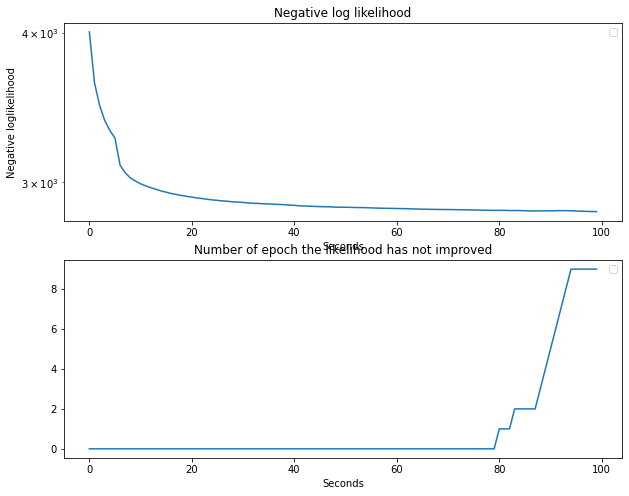

In [17]:
show(IMPS_model)

<AxesSubplot:>

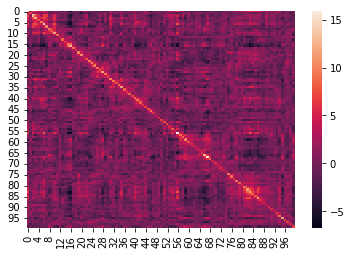

In [18]:
n_a = 700
n_b = 800

sns.heatmap(IMPS_model.Sigma()[n_a:n_b,n_a:n_b])

<AxesSubplot:>

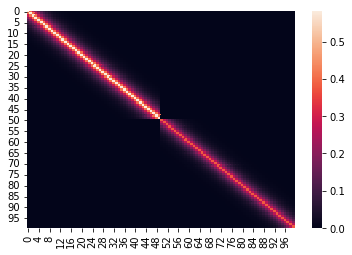

In [13]:
sns.heatmap(Sigma_sampling[n_a:n_b, n_a:n_b])

In [19]:
print('MSE beta', MSE(IMPS_model.beta_mean-true_beta))
print('MSE Sigma', MSE(IMPS_model.Sigma()-true_Sigma_sampling))

MSE beta tensor(0.0176)
MSE Sigma tensor(2.4915)


## fitting the Variational model

In [26]:
fastModel = fastPLN()
%time fastModel.fit(Y,O,covariates, 200, lr = 0.1, tolerance = 10e-4, verbose = True)
#fastModel.C = torch.from_numpy(C_from_Sigma(fastModel.Sigma.detach(), q)).detach()

device  cuda


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [325]:
print(MSE(fastModel.Sigma-Sigma_sampling))
print(MSE(fastModel.beta-true_beta))

tensor(0.0344)
tensor(0.0051)


In [326]:
sns.heatmap(fastModel.Sigma.detach())

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbf9ed7c940> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

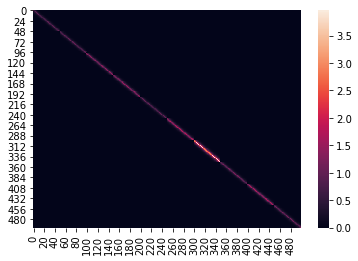

In [202]:
sns.heatmap(Sigma_sampling)

## Computing the likelihoods for each model.

In [18]:
log_like_IMPS_list = list()
log_like_fast_list = list()
for i in tqdm(range(20)): 
    log_like_IMPS_list.append(log_likelihood(Y,O,covariates, IMPS_model.C_mean, IMPS_model.beta_mean, acc = 0.005).detach().item())
    log_like_fast_list.append(log_likelihood(Y,O,covariates, fastModel.C, fastModel.beta.detach(), acc = 0.005).detach().item())

100%|██████████| 20/20 [00:12<00:00,  1.56it/s]


## Comparing both likelihoods 

/home/bastien/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bastien/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


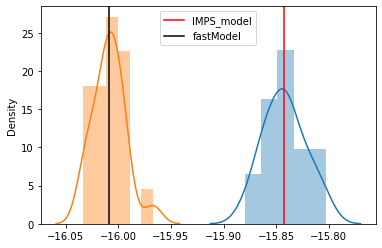

In [19]:
log_like_IMPS = np.mean(np.array(log_like_IMPS_list))
log_like_fast = np.mean(np.array(log_like_fast_list))


sns.distplot(np.array(log_like_IMPS_list))
plt.axvline(log_like_IMPS, label = 'IMPS_model', c = 'red')

sns.distplot(np.array(log_like_fast_list))
plt.axvline(log_like_fast, label = 'fastModel', c = 'black')
plt.legend()

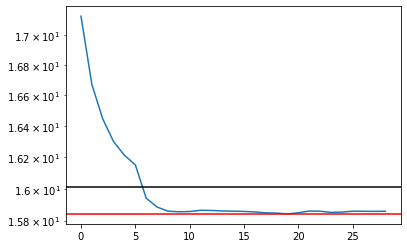

In [20]:
l = IMPS_model.log_likelihood_list
plt.plot(np.arange(0, len(l)), - np.array(l))

plt.axhline(-log_like_fast, c = 'black', label = 'IMPS_model')
plt.axhline(-log_like_IMPS, c = 'red', label = 'fastModel')
plt.yscale('log')

## Comparing the MSEs  

In [156]:
#print('MSE beta for IMPS', MSE(IMPS_model.beta_mean-true_beta))
print('MSE beta for Var App', MSE(fastModel.beta-true_beta).detach())

MSE beta for Var App tensor(0.0994)


In [157]:
#print('MSE Sigma for IMPS: ', MSE(IMPS_model.Sigma()-true_Sigma_sampling))
print('MSE Sigma for IMPS: ', MSE(fastModel.Sigma-true_Sigma_sampling))

MSE Sigma for IMPS:  tensor(0.7629, grad_fn=<MeanBackward0>)


## additional 

In [35]:
IMPS_model.beta_mean

tensor([[-4.2995e-02,  1.4011e-01, -4.1408e-01,  5.7551e-03, -1.0687e-01,
         -4.6650e-01, -4.2465e-01,  7.8986e-02,  4.0549e-01, -4.7068e-01,
         -4.1786e-01, -2.2352e-01, -1.9917e-01,  8.6350e-01,  5.4368e-01,
         -7.2152e-02,  4.6854e-01,  7.7282e-01,  3.0317e-01,  5.7381e-01,
          3.4583e-01,  6.8890e-01,  2.9446e-01,  2.6742e-01,  4.3887e-01,
         -1.8218e-01, -1.4808e-02, -7.7387e-03,  5.1723e-03,  1.5539e-01,
          3.5229e-01,  2.3994e-01,  5.3226e-01, -5.9380e-01, -1.9871e-01,
          3.4108e-01,  4.4736e-01, -1.0495e-02, -1.6037e-01, -1.6108e-01,
         -2.1306e-01, -2.2988e-01,  2.3285e-01, -1.3248e-01,  4.3287e-01,
          6.8753e-01, -1.8264e-02, -1.6492e-01,  4.2250e-01,  3.1361e-01,
         -1.3262e-01,  6.0375e-02,  1.4002e-02,  3.1982e-01,  2.4919e-01,
          3.4656e-01, -1.8159e-01, -4.4648e-01, -9.9878e-02,  5.3317e-02,
          4.4652e-01,  4.3501e-01, -5.2222e-02, -2.3792e-02,  2.0964e-01,
         -2.1938e-01, -6.5044e-01, -1.

In [36]:
true_beta

tensor([[-1.1644e-01,  1.1722e-01, -5.2990e-01, -7.1775e-02, -1.1452e-01,
         -4.4224e-01, -3.4904e-01,  3.7265e-02,  3.5723e-01, -4.2333e-01,
         -4.6506e-01, -2.9983e-01, -2.1870e-01,  7.5900e-01,  4.3989e-01,
         -1.7023e-01,  3.1625e-01,  5.2177e-01,  1.3502e-01,  3.9810e-01,
          2.0435e-01,  5.9238e-01,  2.3352e-01,  2.4914e-01,  4.5444e-01,
         -1.8954e-01, -1.0180e-02, -3.7389e-02, -1.3363e-01,  1.2851e-01,
          3.1765e-01,  2.2889e-01,  4.9238e-01, -6.5377e-01, -1.8661e-01,
          3.5880e-01,  4.0051e-01,  1.2025e-02, -1.7191e-01, -1.9187e-01,
         -2.5920e-01, -3.0213e-01,  2.0843e-01, -1.1795e-01,  3.5241e-01,
          4.9276e-01, -7.7064e-02, -2.3672e-01,  3.6729e-01,  2.9998e-01,
         -1.4670e-01,  5.4048e-03,  5.0838e-03,  3.3024e-01,  2.5163e-01,
          3.9649e-01, -1.5534e-01, -4.3829e-01, -5.9374e-02,  8.8648e-02,
          4.6414e-01,  4.7064e-01, -8.0573e-03, -4.2897e-02,  2.1287e-01,
         -2.1086e-01, -6.5799e-01, -1.